In [37]:
%pylab
%matplotlib inline 
import os
import sys; sys.path.append("..")
import warnings; warnings.filterwarnings("ignore")

import pandas as pd
from utils import utils

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [38]:
## Hyper Prameters
method='csp'
data_name='aa'

In [39]:
## load data
filename = 'data_set_IVa_{}'.format(data_name)
data_dir = os.path.join("./Datasets/", filename)
data_path = os.path.join(data_dir, filename + '_' + method + '.csv')
df = pd.read_csv(data_path)
result = utils.test_model(df)

res_df = pd.DataFrame(result)
res_df.columns = ['method', 'score']
res_df

======================================== result ========================================
                           Model           Accuracy       time
                              GaussianNB     0.6460       0.00 s
                           MultinomialNB     0.5644       0.00 s
                             BernoulliNB     0.5050       0.00 s
                    KNeighborsClassifier     0.6015       0.07 s
                                     SVC     0.6312       0.05 s
               GaussianProcessClassifier     0.6485       3.95 s
                  DecisionTreeClassifier     0.5767       0.01 s
                  RandomForestClassifier     0.6510       1.82 s
                      AdaBoostClassifier     0.6510       0.85 s
              LinearDiscriminantAnalysis     0.6337       0.01 s
           QuadraticDiscriminantAnalysis     0.6188       0.01 s
                           XGBClassifier     0.6460       1.49 s
                           MLPClassifier     0.6262       2.72 s


,method,score
0,GaussianNB,0.646040
1,MultinomialNB,0.564356
2,BernoulliNB,0.504950
3,KNeighborsClassifier,0.601485
4,SVC,0.631188
5,GaussianProcessClassifier,0.648515
6,DecisionTreeClassifier,0.576733
7,RandomForestClassifier,0.650990
8,AdaBoostClassifier,0.650990
9,LinearDiscriminantAnalysis,0.633663


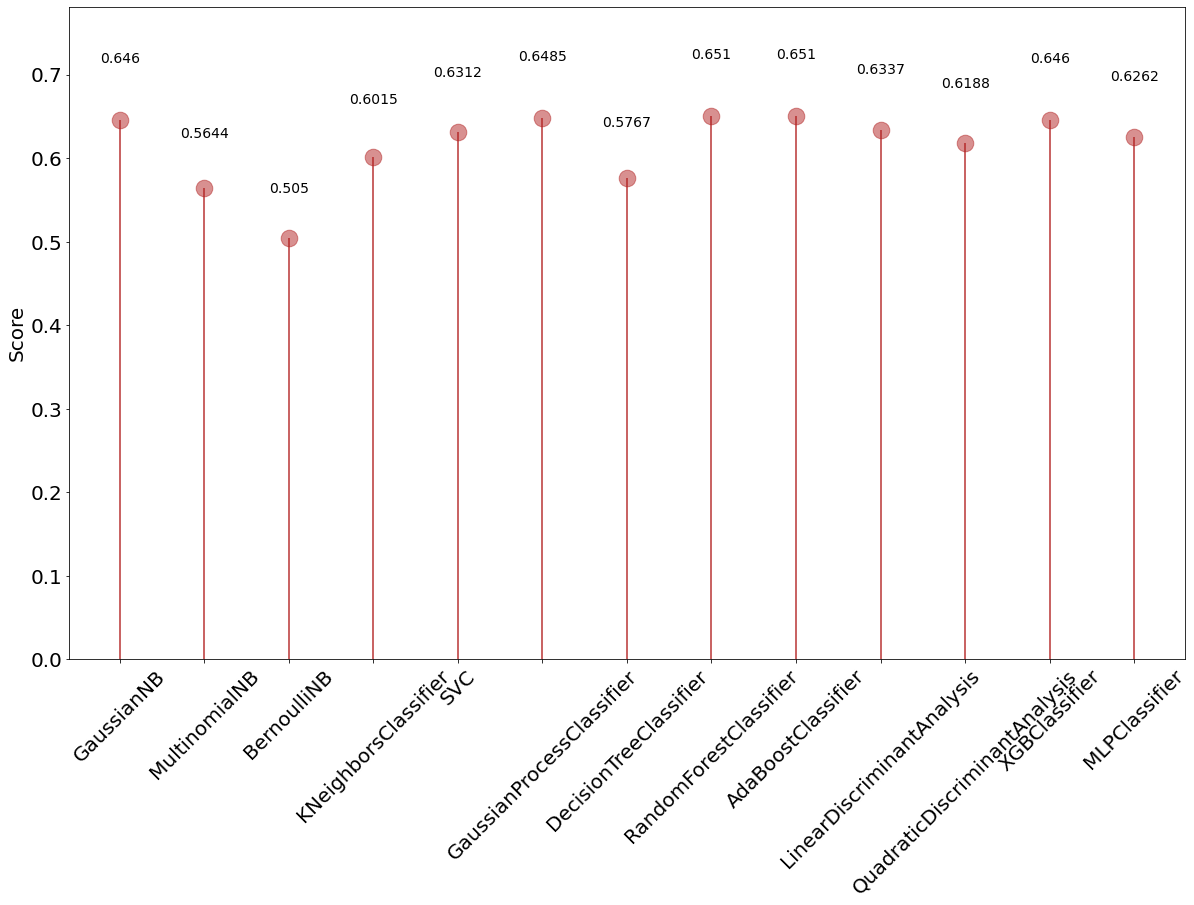

In [40]:
## show different model
plt.figure(figsize=(20, 12))
plt.vlines(x=res_df['method'], ymin=0, ymax=res_df['score'], color='firebrick', alpha=0.7, linewidth=2)
plt.scatter(res_df['method'], res_df['score'], s=275, color='firebrick', alpha=0.5)

for k in res_df.values:
    plt.text(k[0], k[1]*1.1, round(k[1], 4), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.ylim([0, max(res_df['score'])*1.2])
plt.xticks(fontsize=20, rotation=45);
plt.yticks(fontsize=20);
plt.ylabel('Score', fontsize=20);

In [99]:
def show(res_df, save_path=None):
    plt.figure(figsize=(24, 12))
    plt.vlines(x=res_df['method'], ymin=0, ymax=res_df['score'], color='firebrick', alpha=0.7, linewidth=2)
    plt.scatter(res_df['method'], res_df['score'], s=275, color='firebrick', alpha=0.5)

    for k in res_df.values:
        plt.text(k[0], k[1]*1.1, round(k[1], 4), horizontalalignment= 'center', verticalalignment='bottom', fontsize=22)

    plt.ylim([0, max(res_df['score'])*1.2])
    plt.xticks(fontsize=20, rotation=45);
    plt.yticks(fontsize=20);
    plt.ylabel('Score', fontsize=20);
    if save_path != None:
        plt.savefig(save_path, bbox_inches = 'tight')
    plt.show()


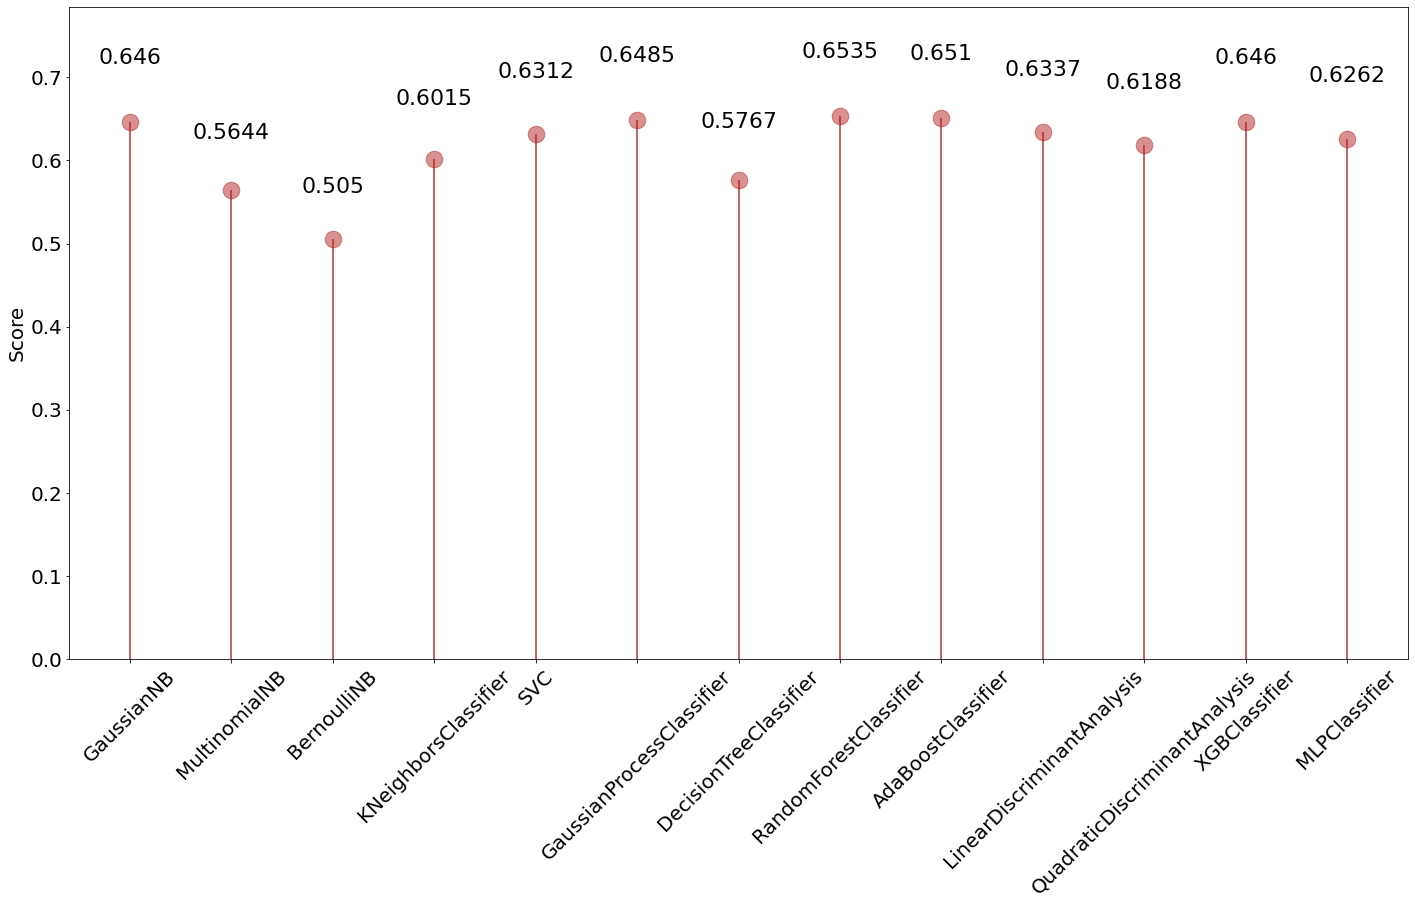

In [100]:
## Hyper Prameters
data_name='aa' # 'aa', 'al', 'av', 'aw', 'ay'
method='csp'  # 'csp', 'bandpowers', 'dct', 'wavelet'


filename='data_set_IVa_{}'.format(data_name)
data_path = os.path.join('./result', filename, filename + '_{}'.format(method)+'_result.csv')
res_df = pd.read_csv(data_path)
show(res_df)


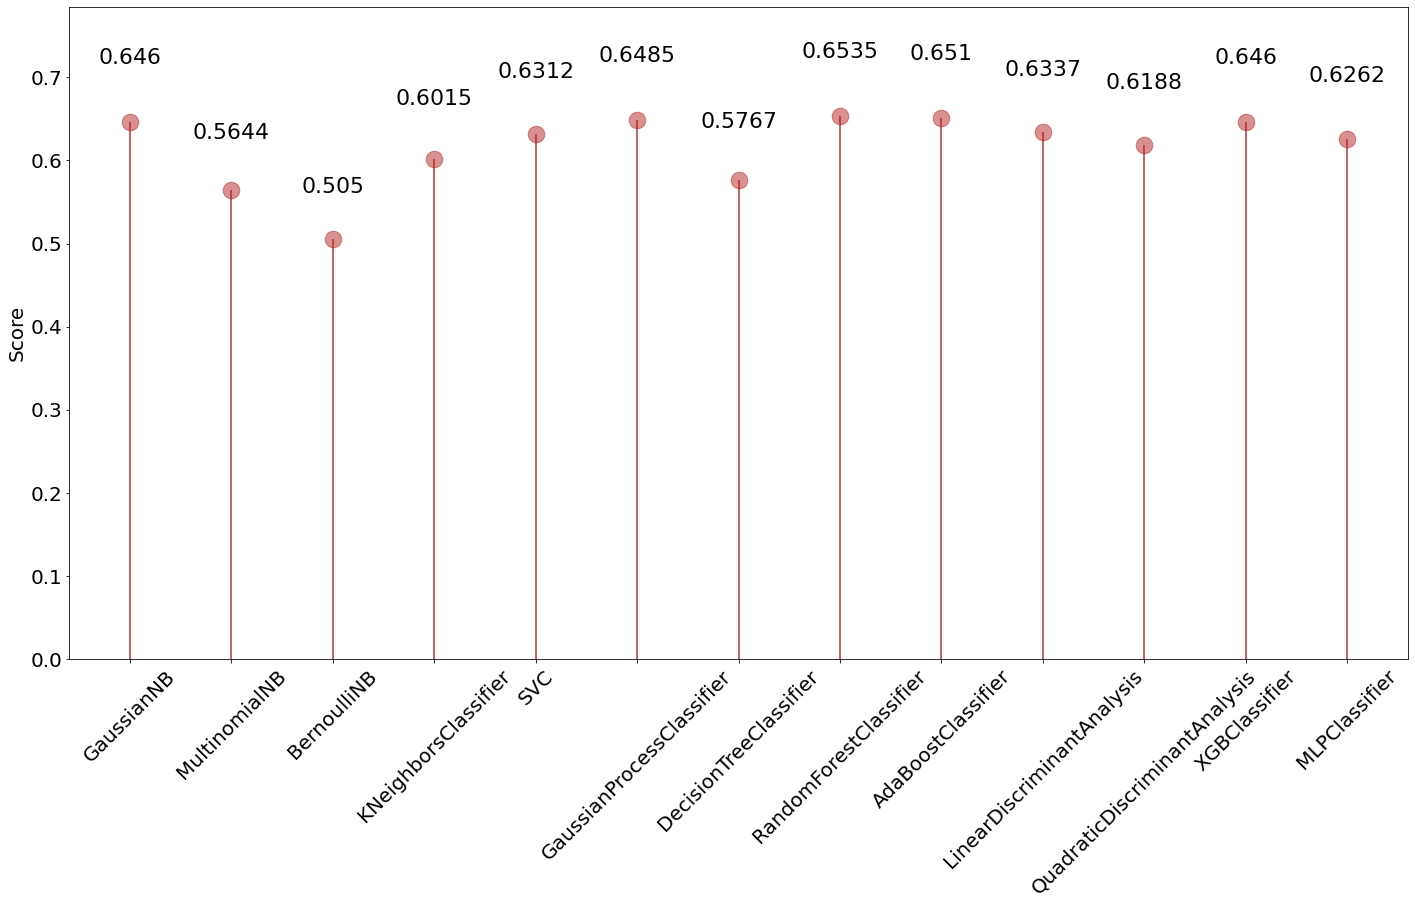

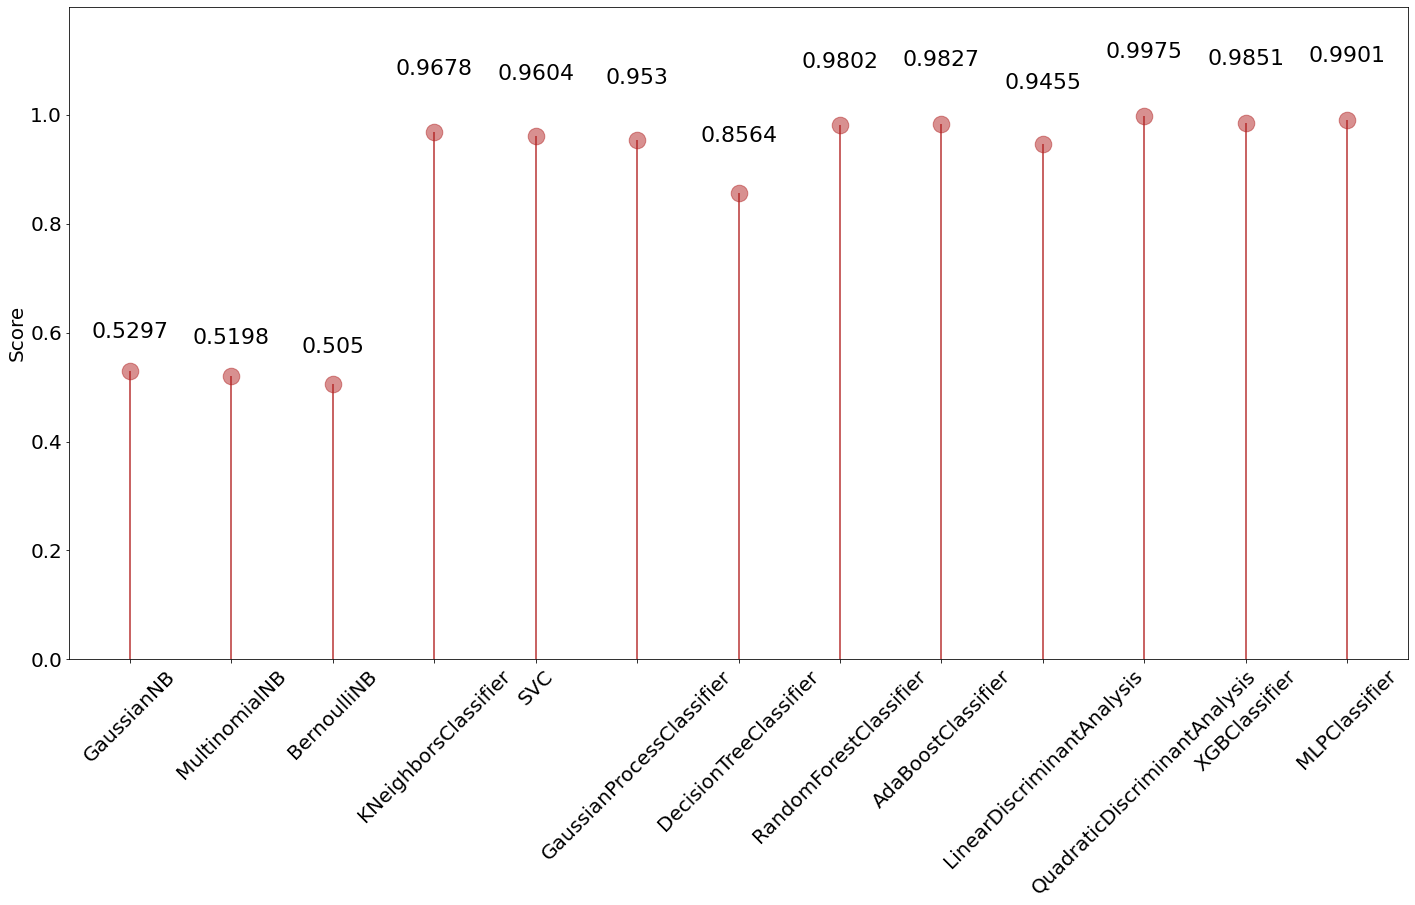

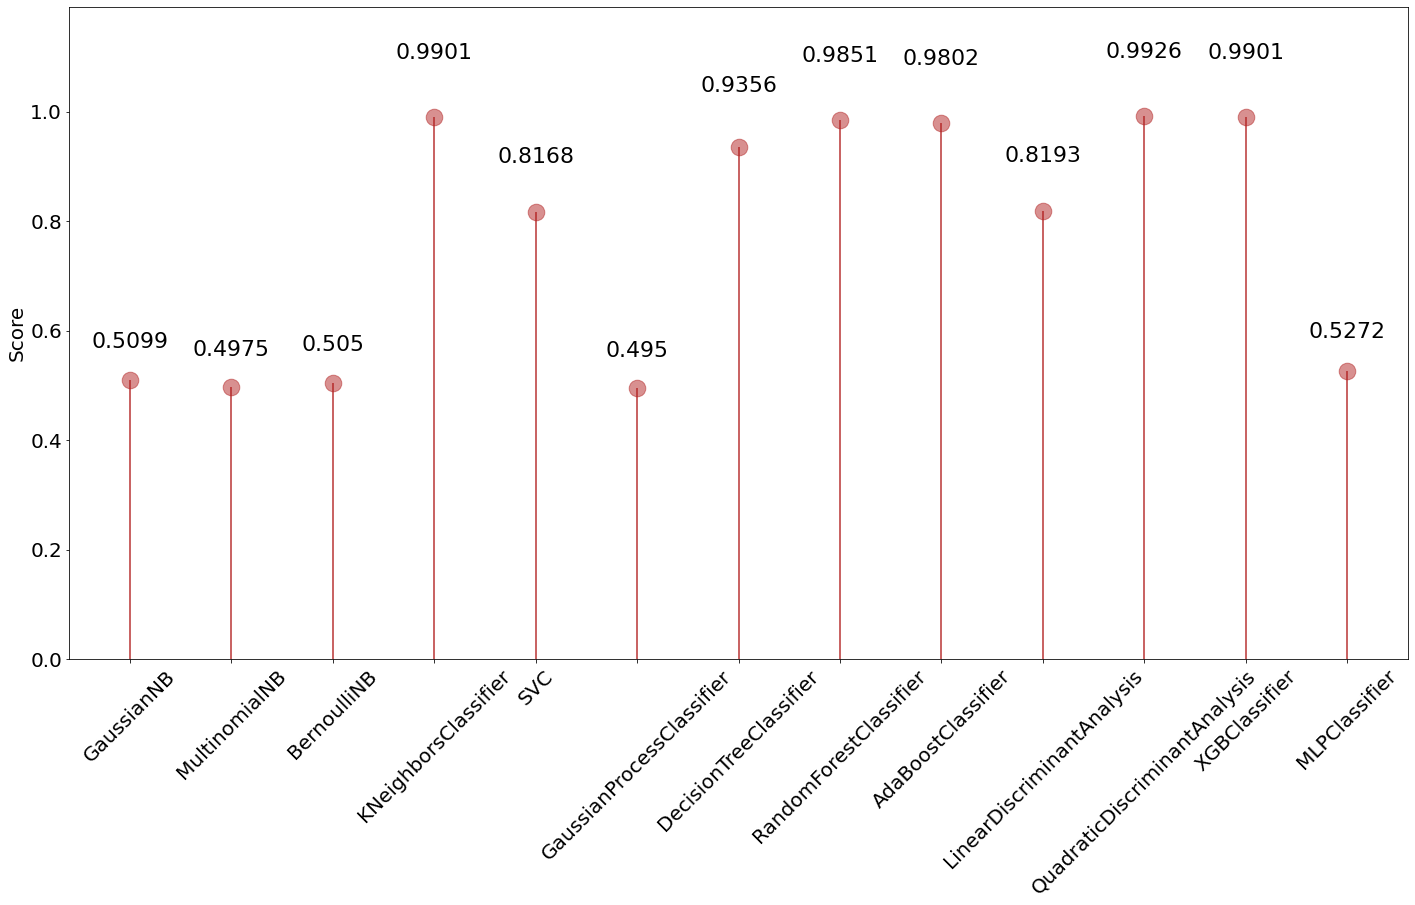

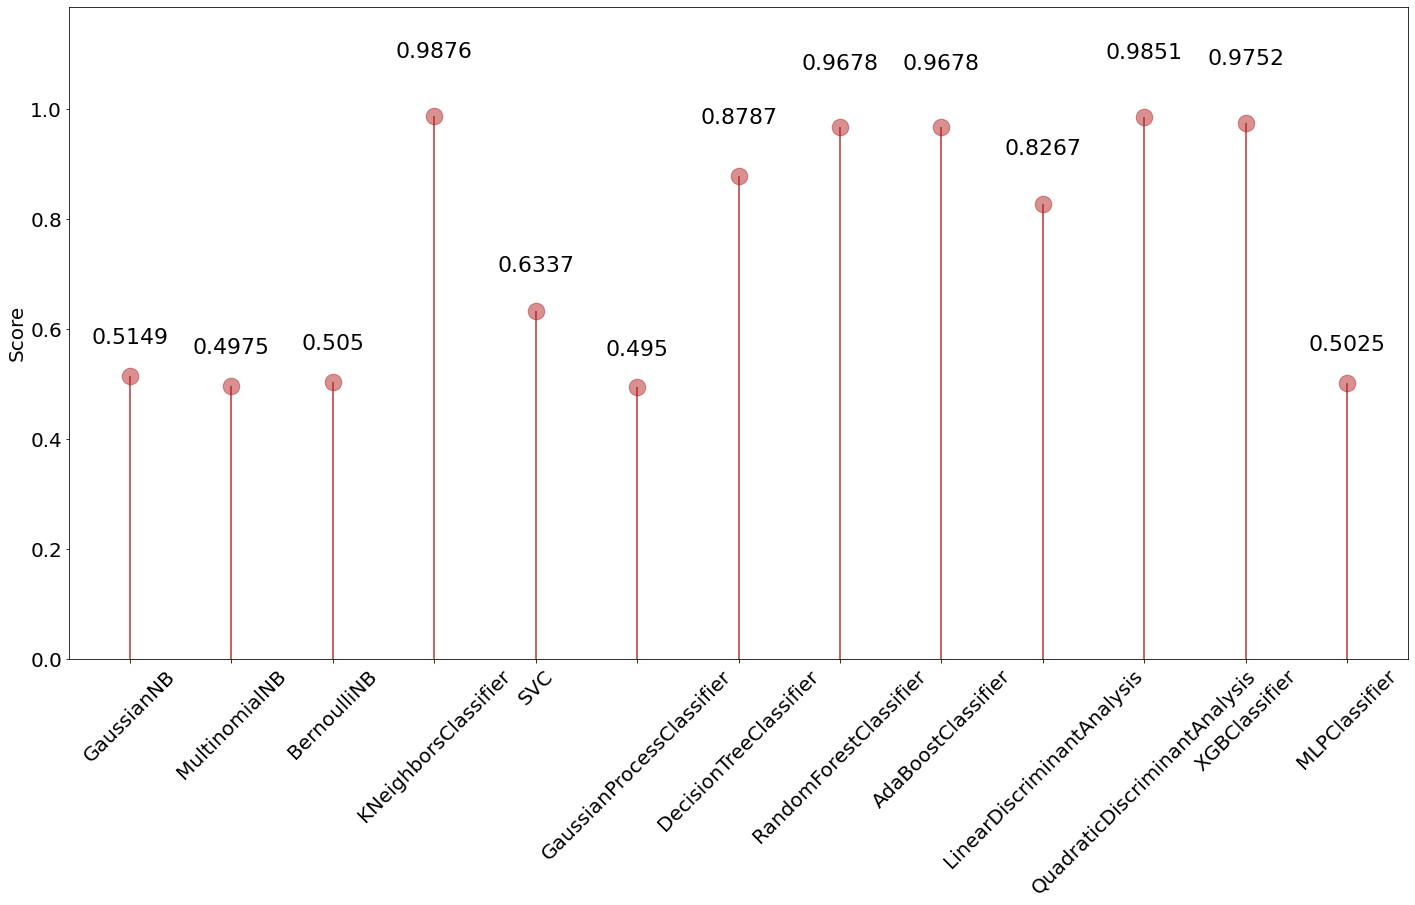

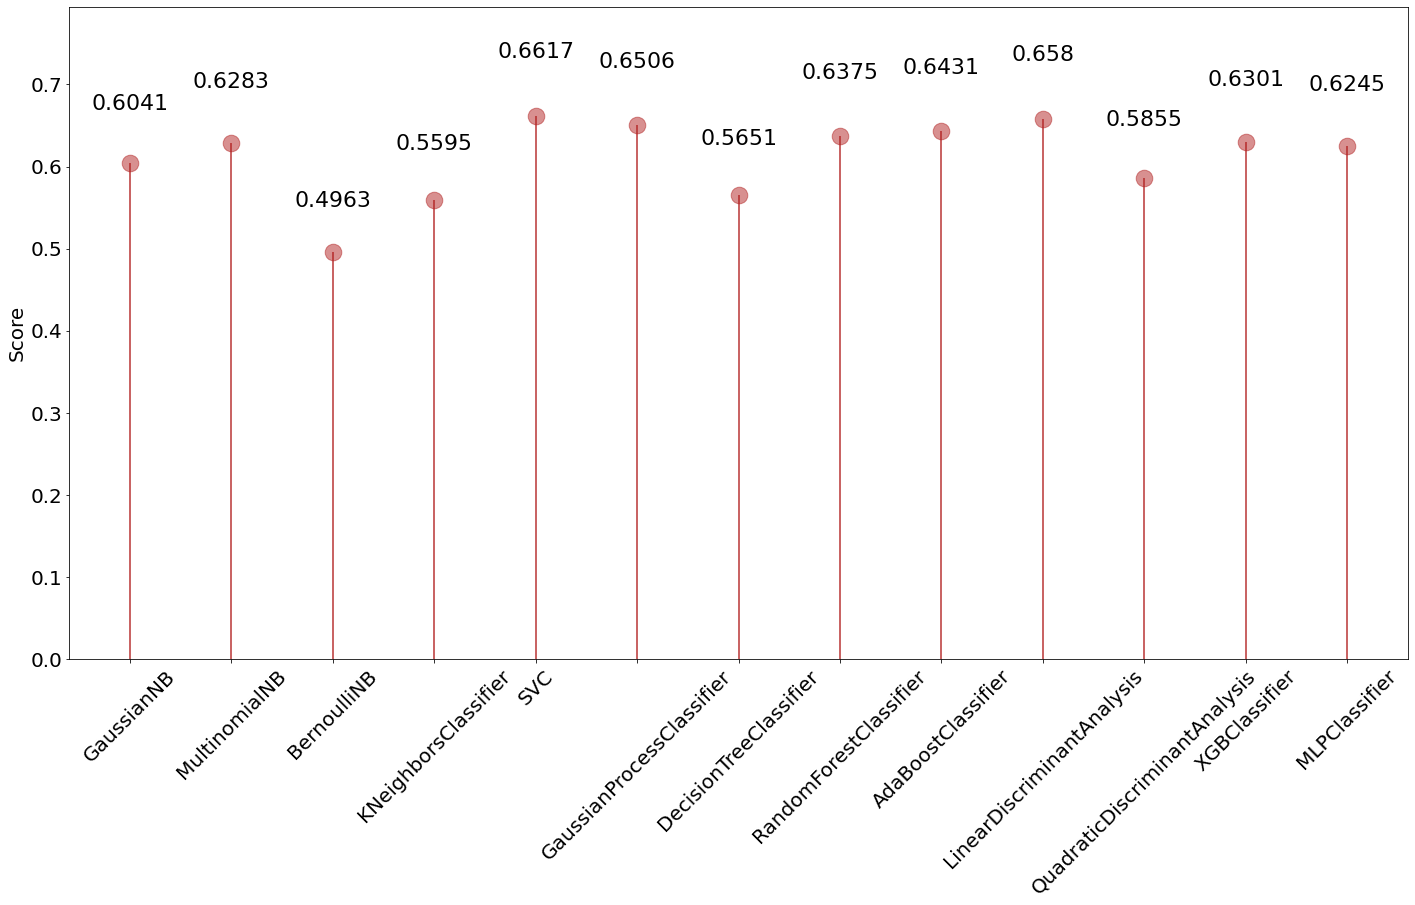

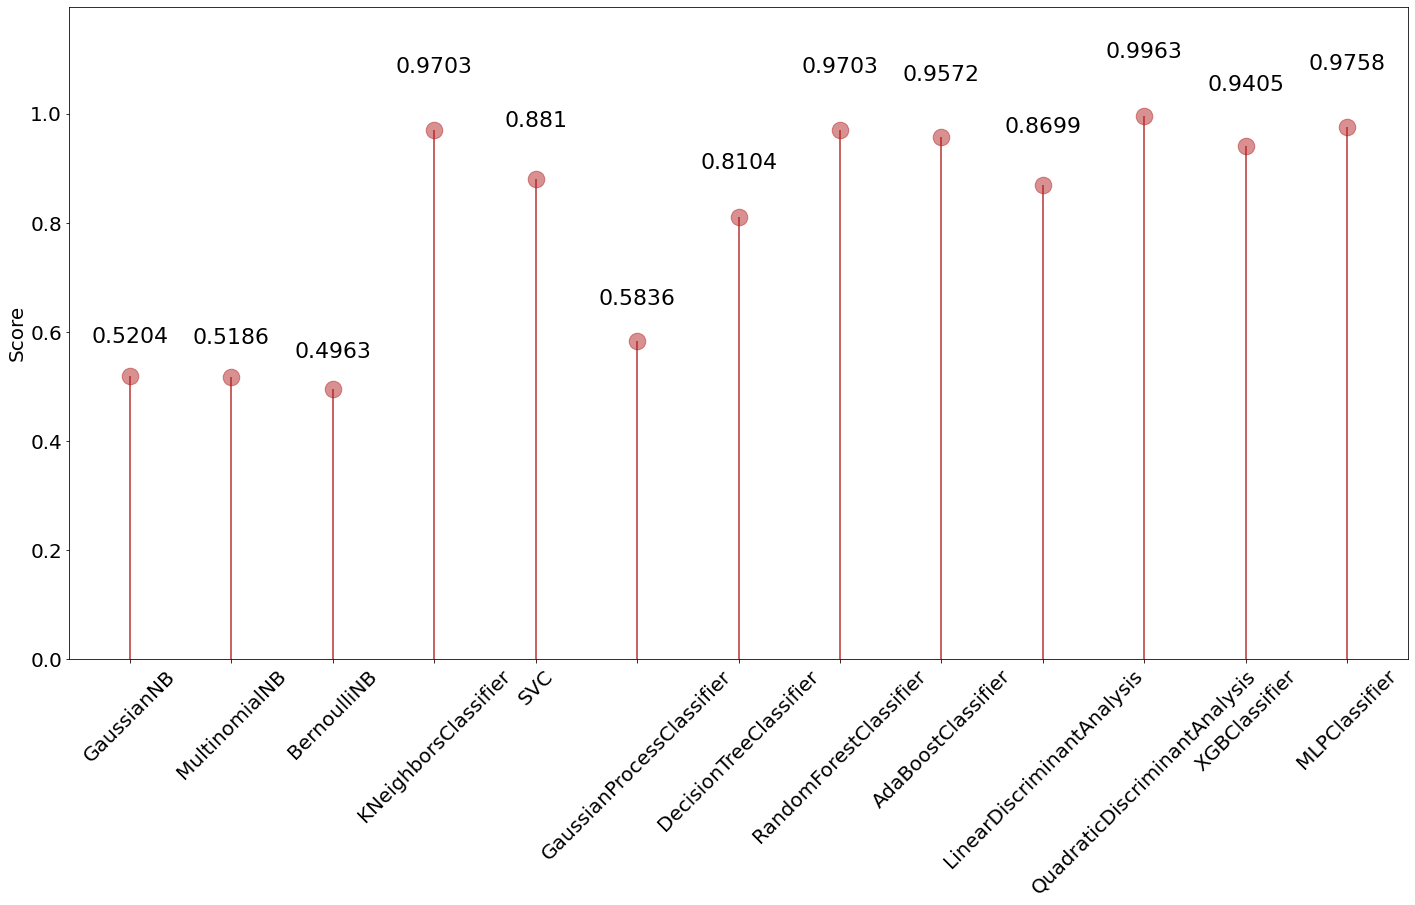

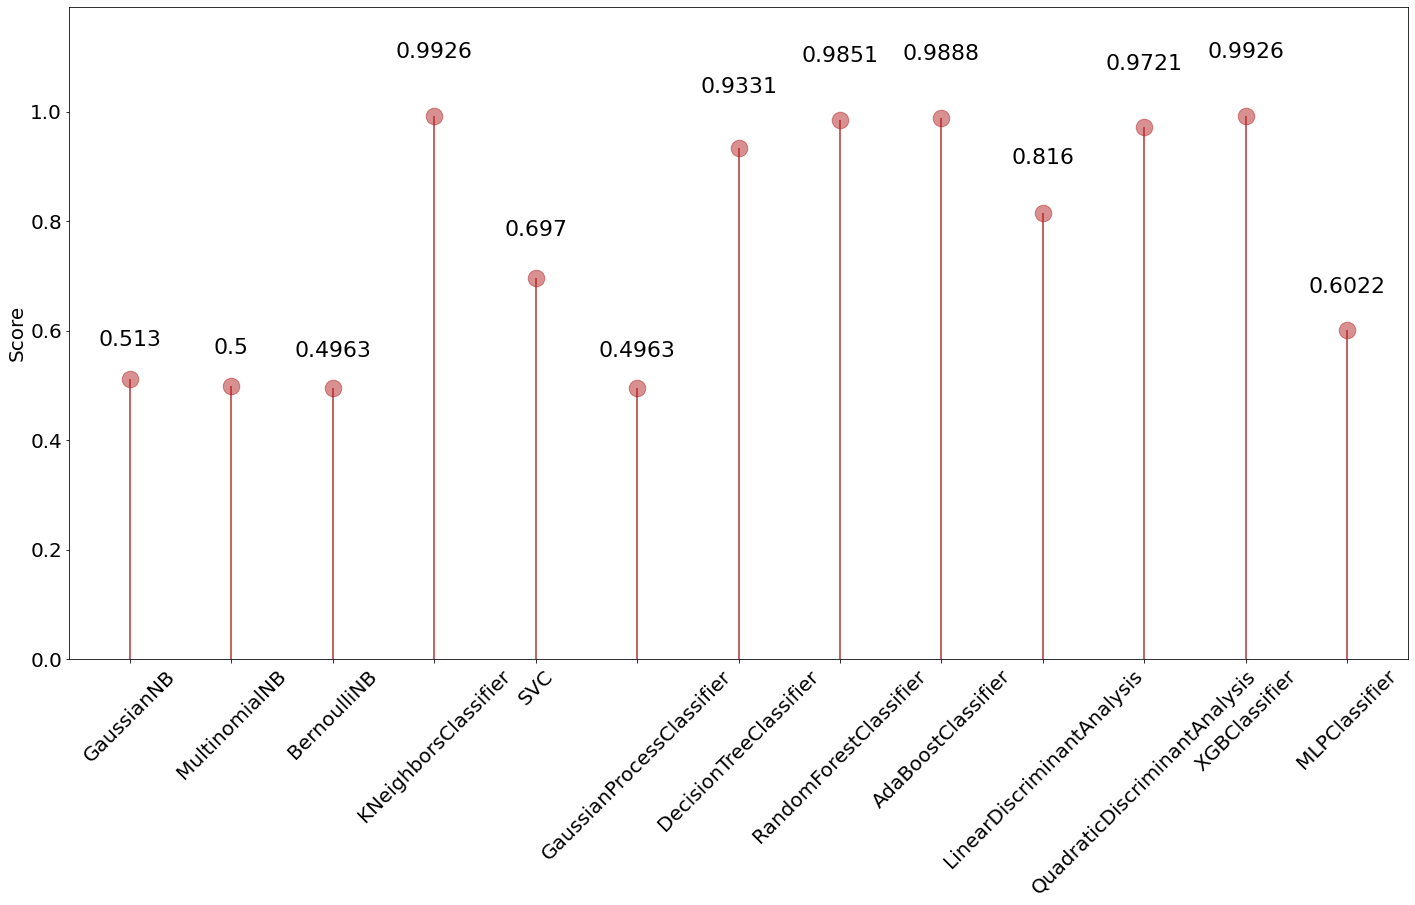

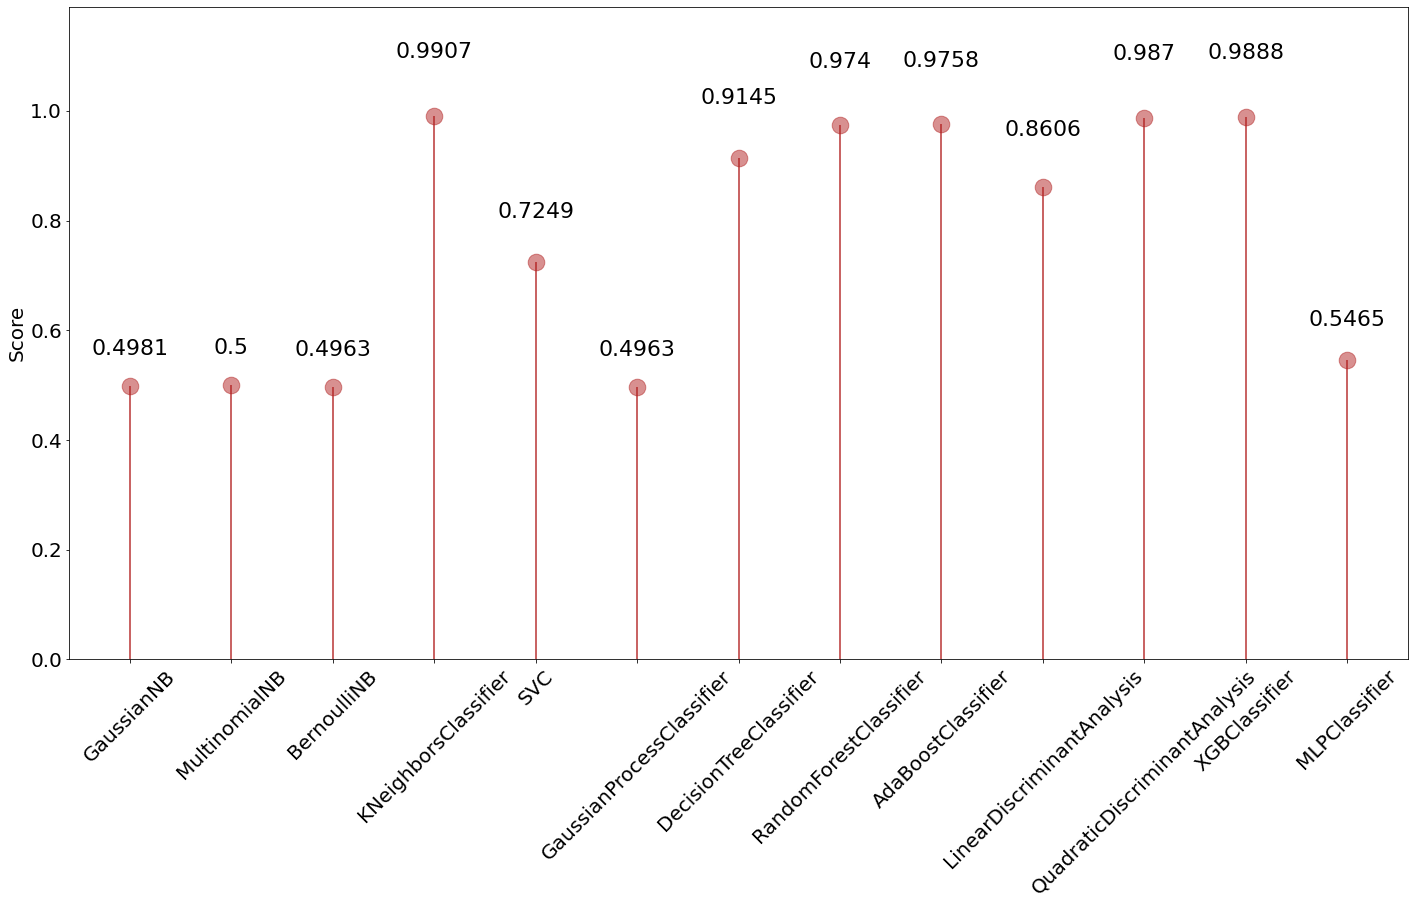

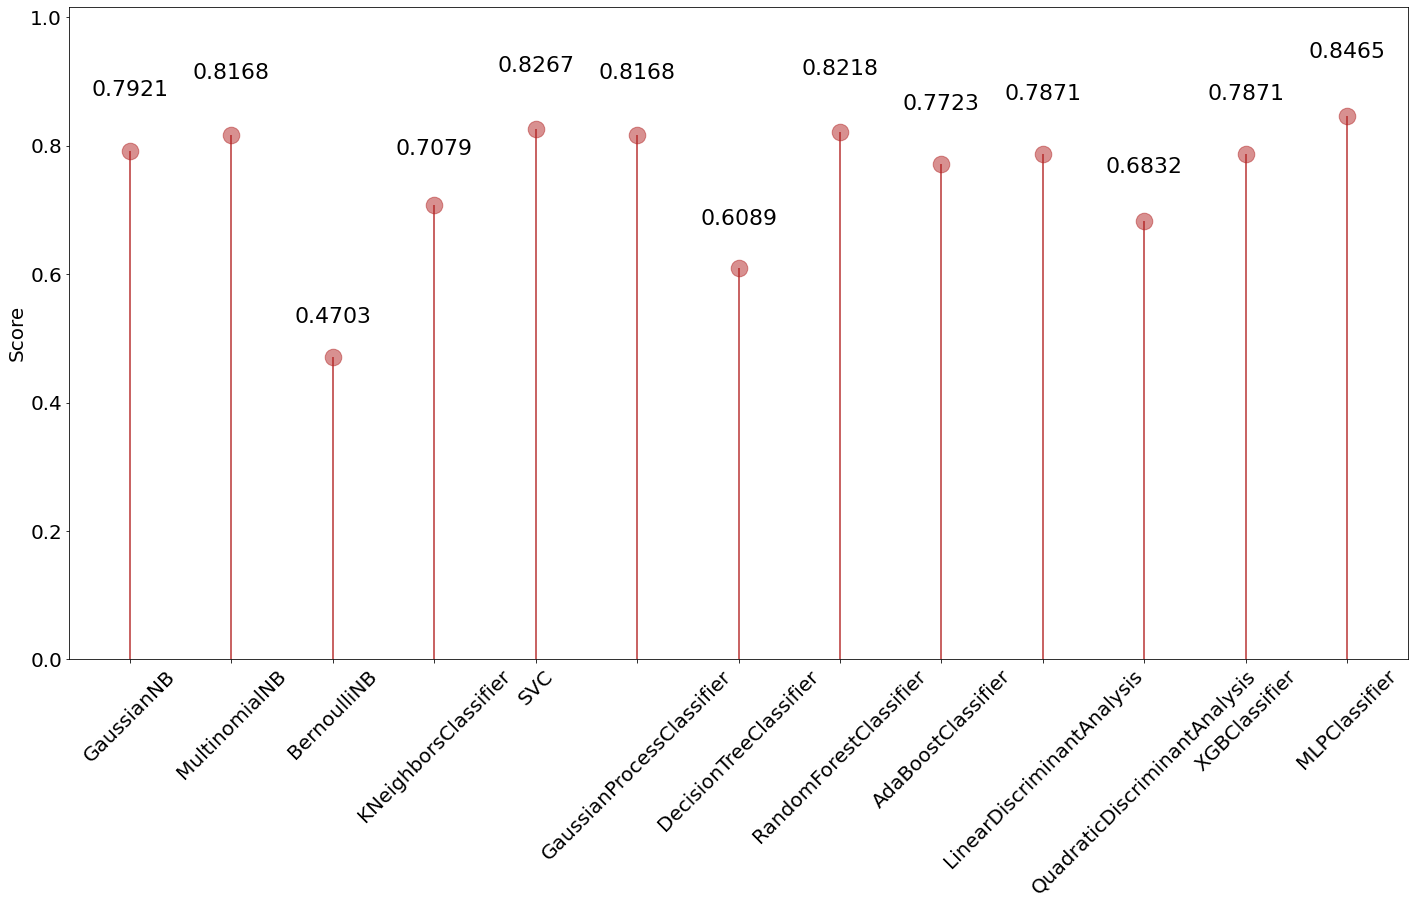

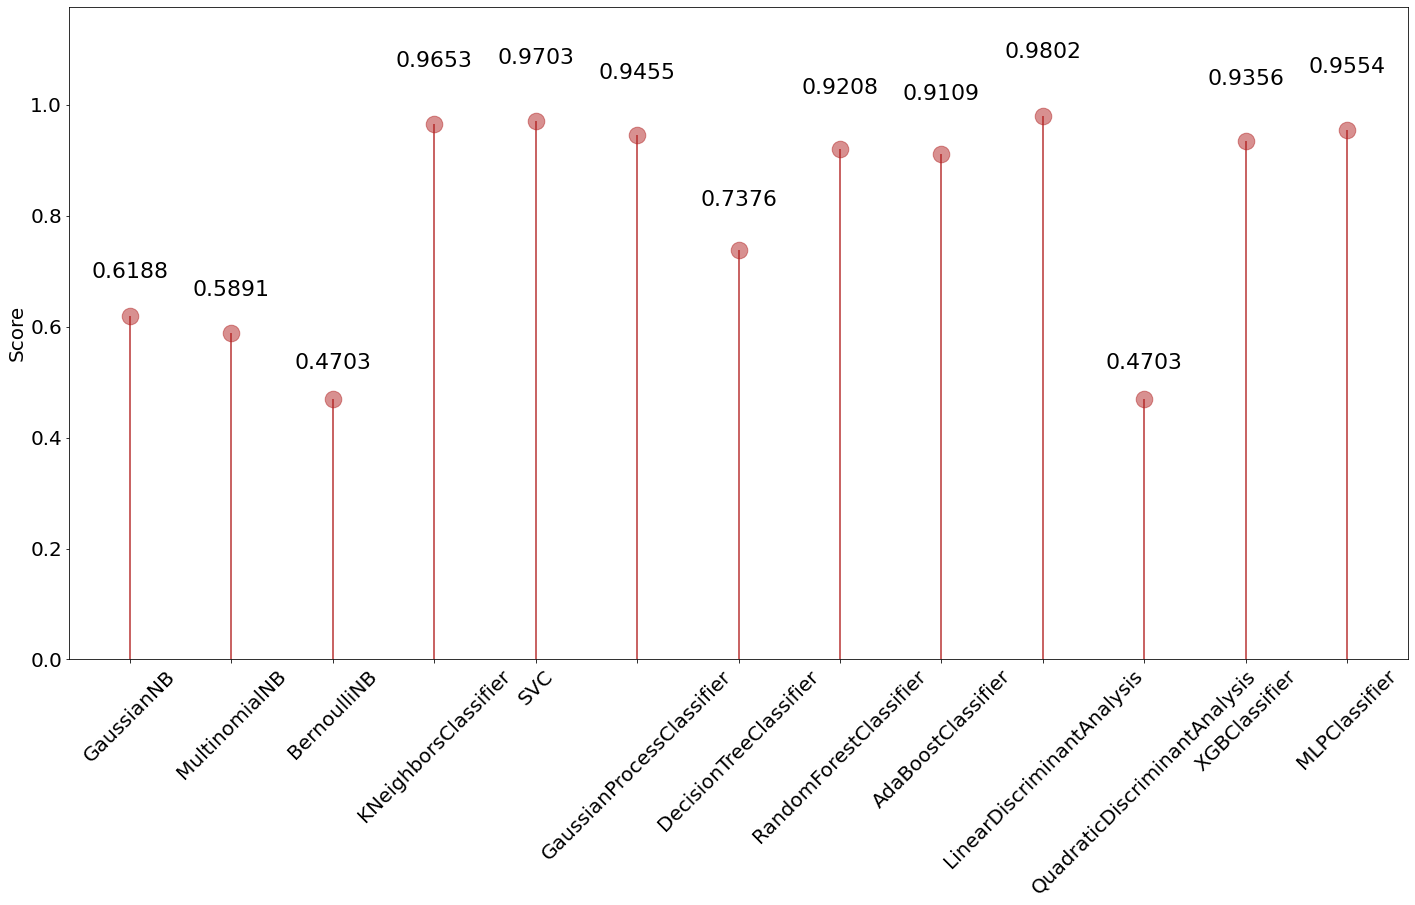

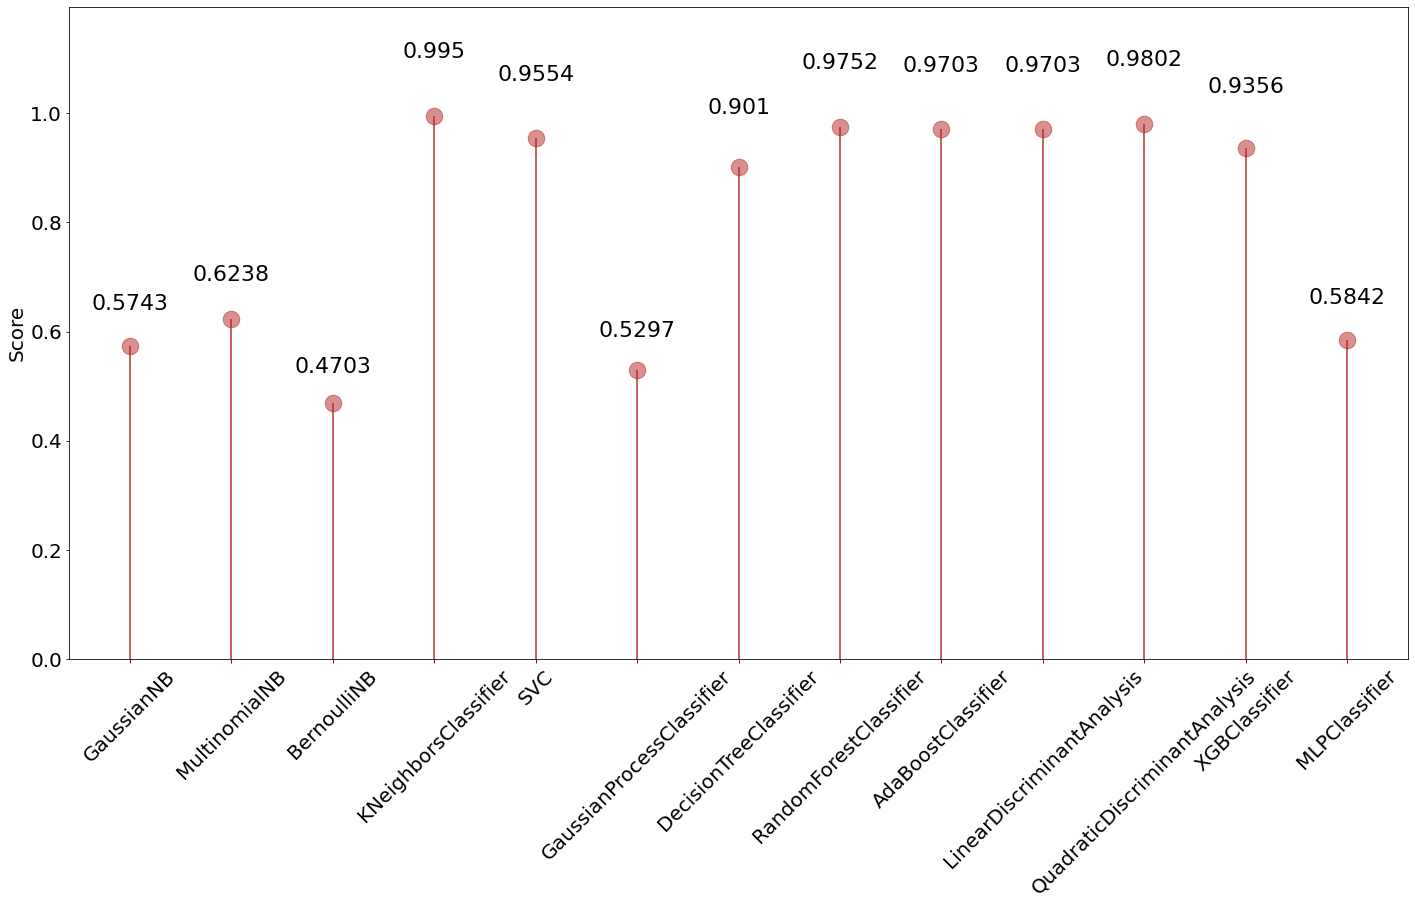

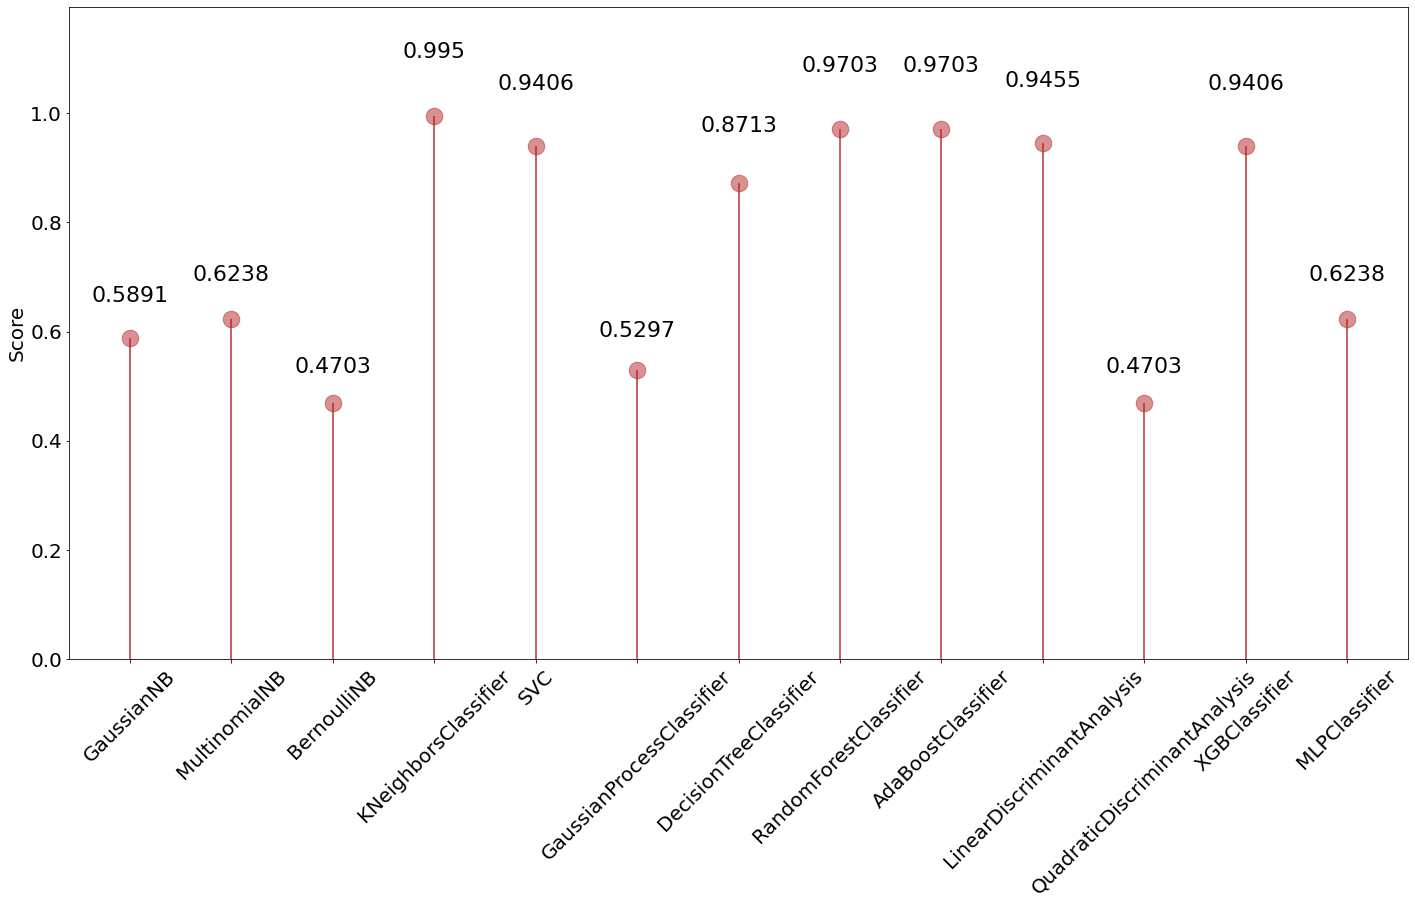

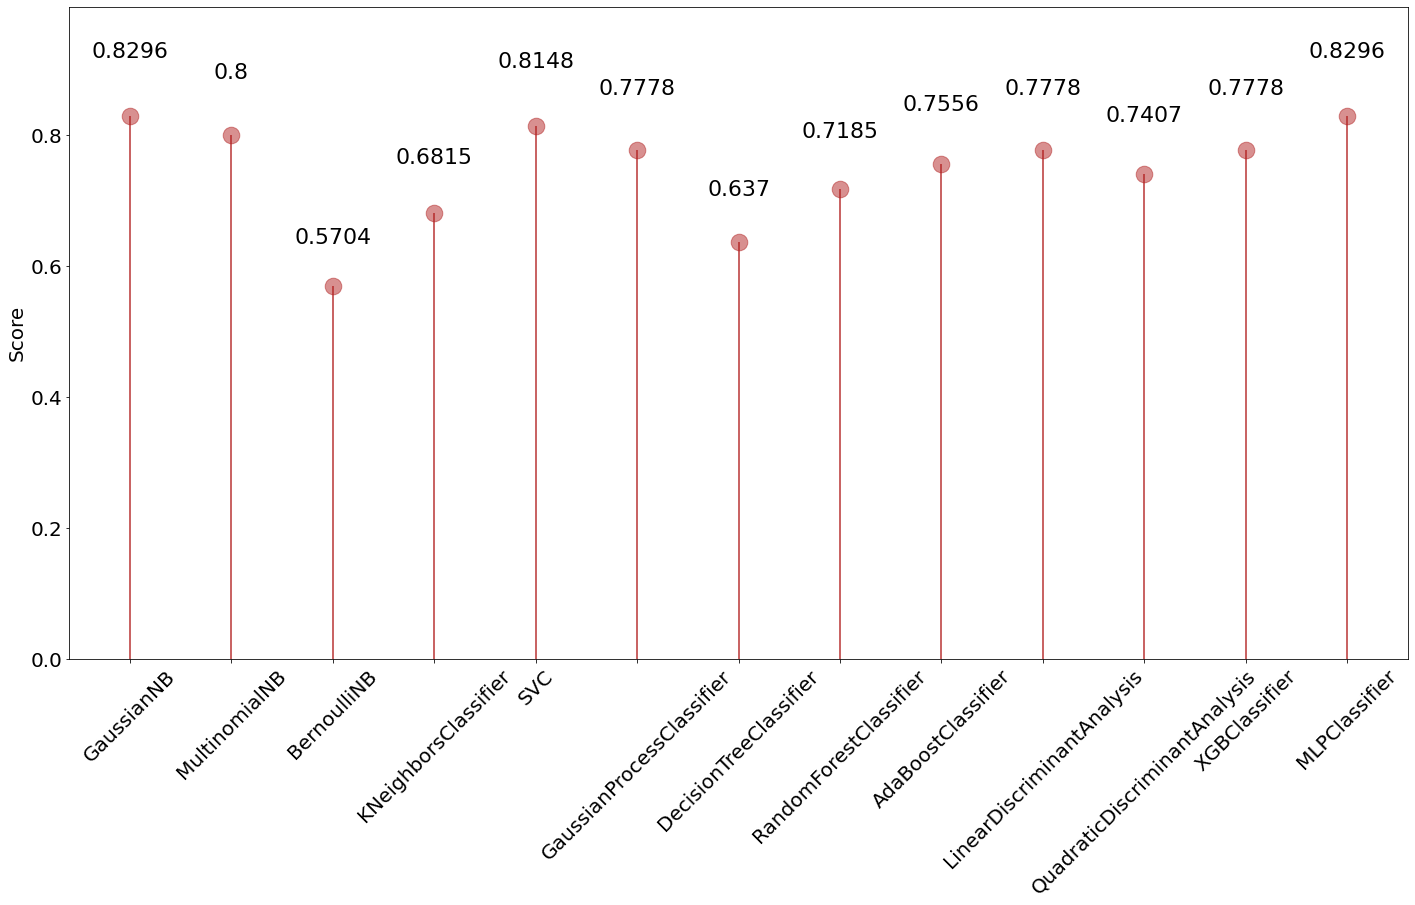

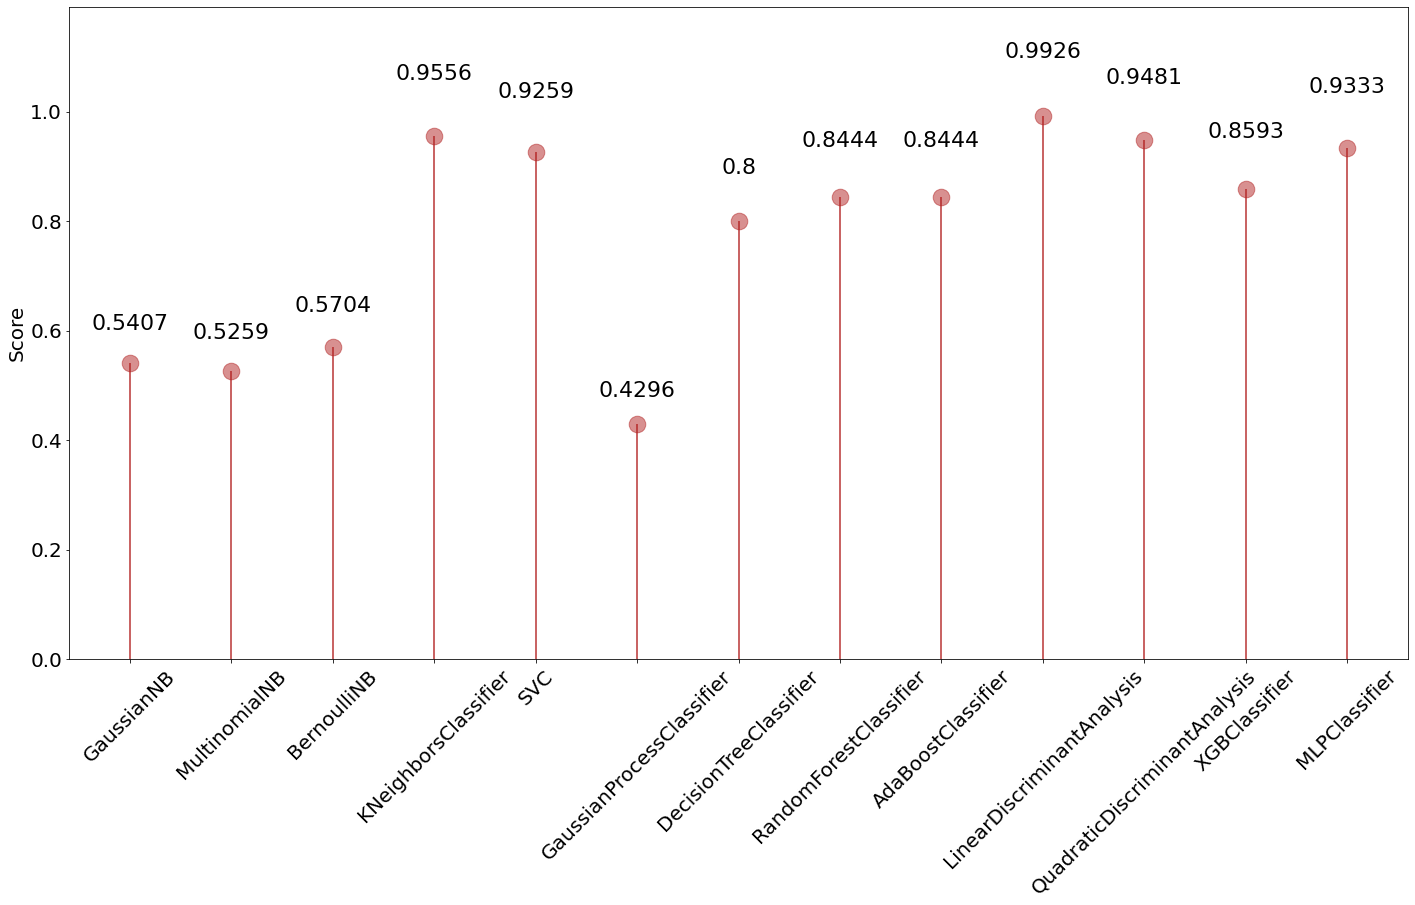

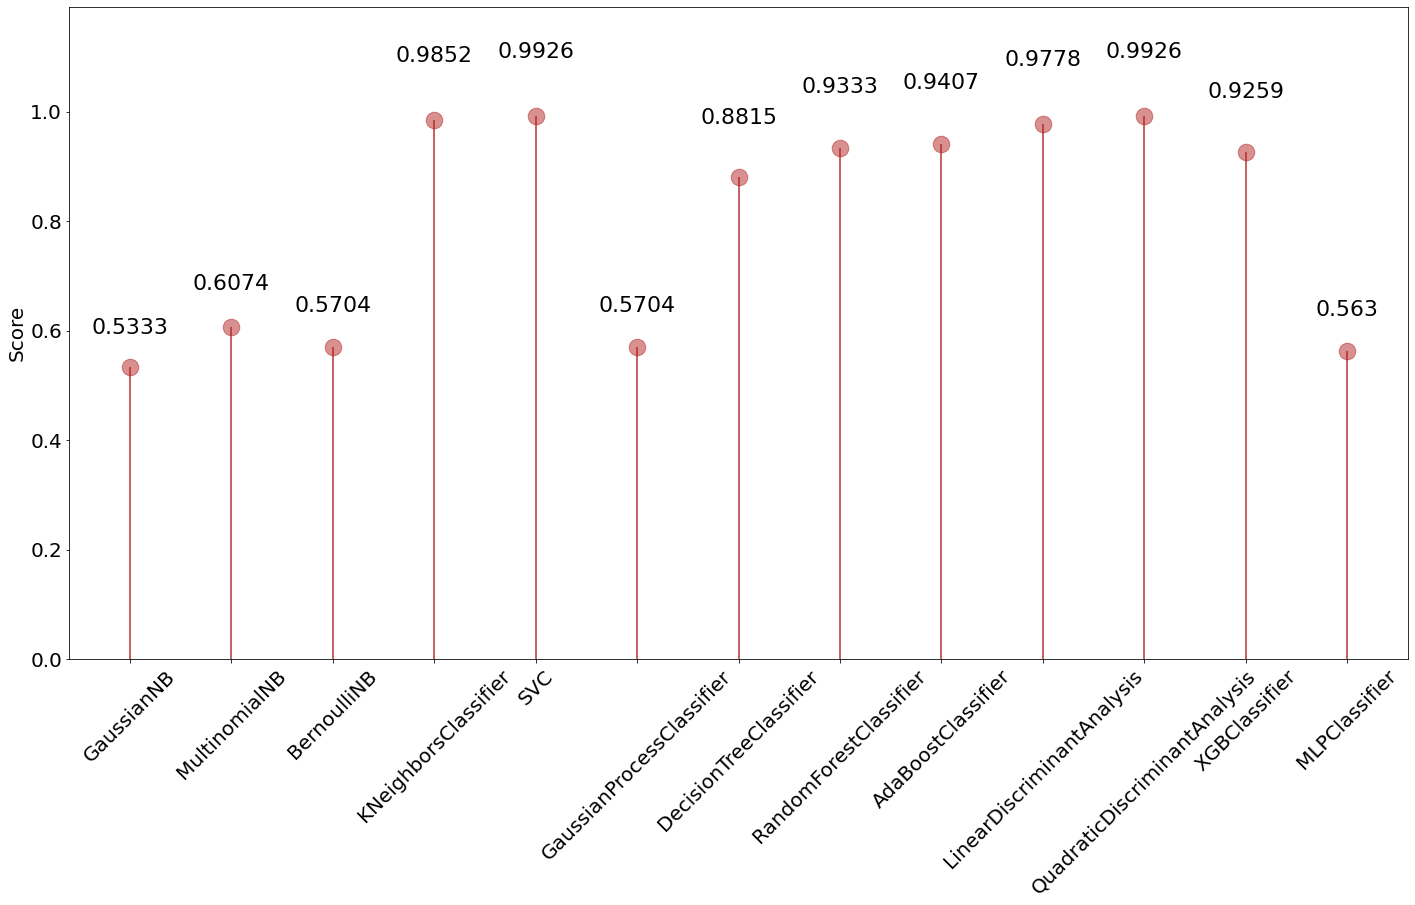

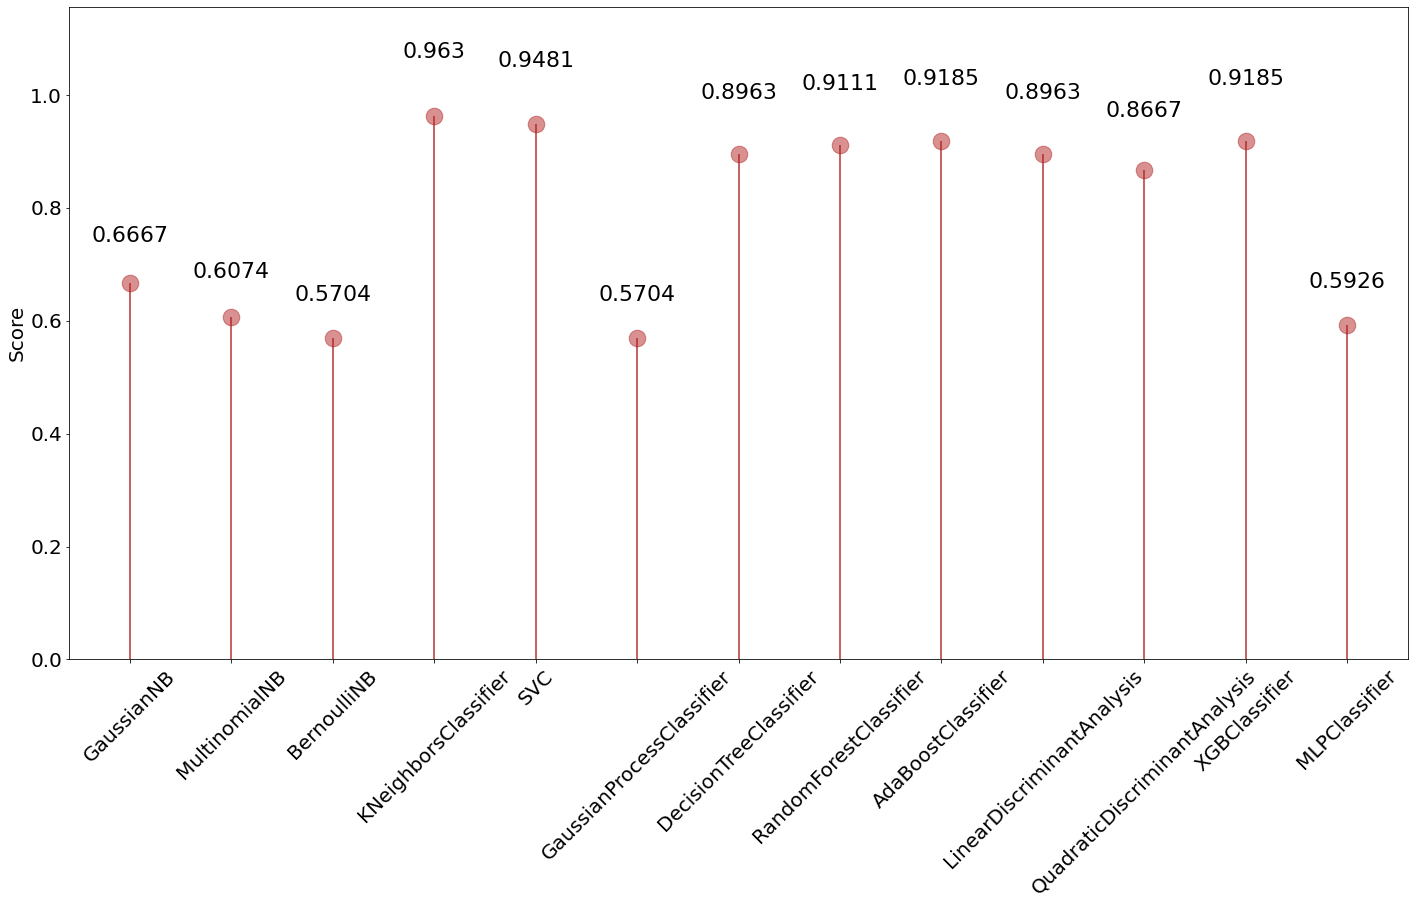

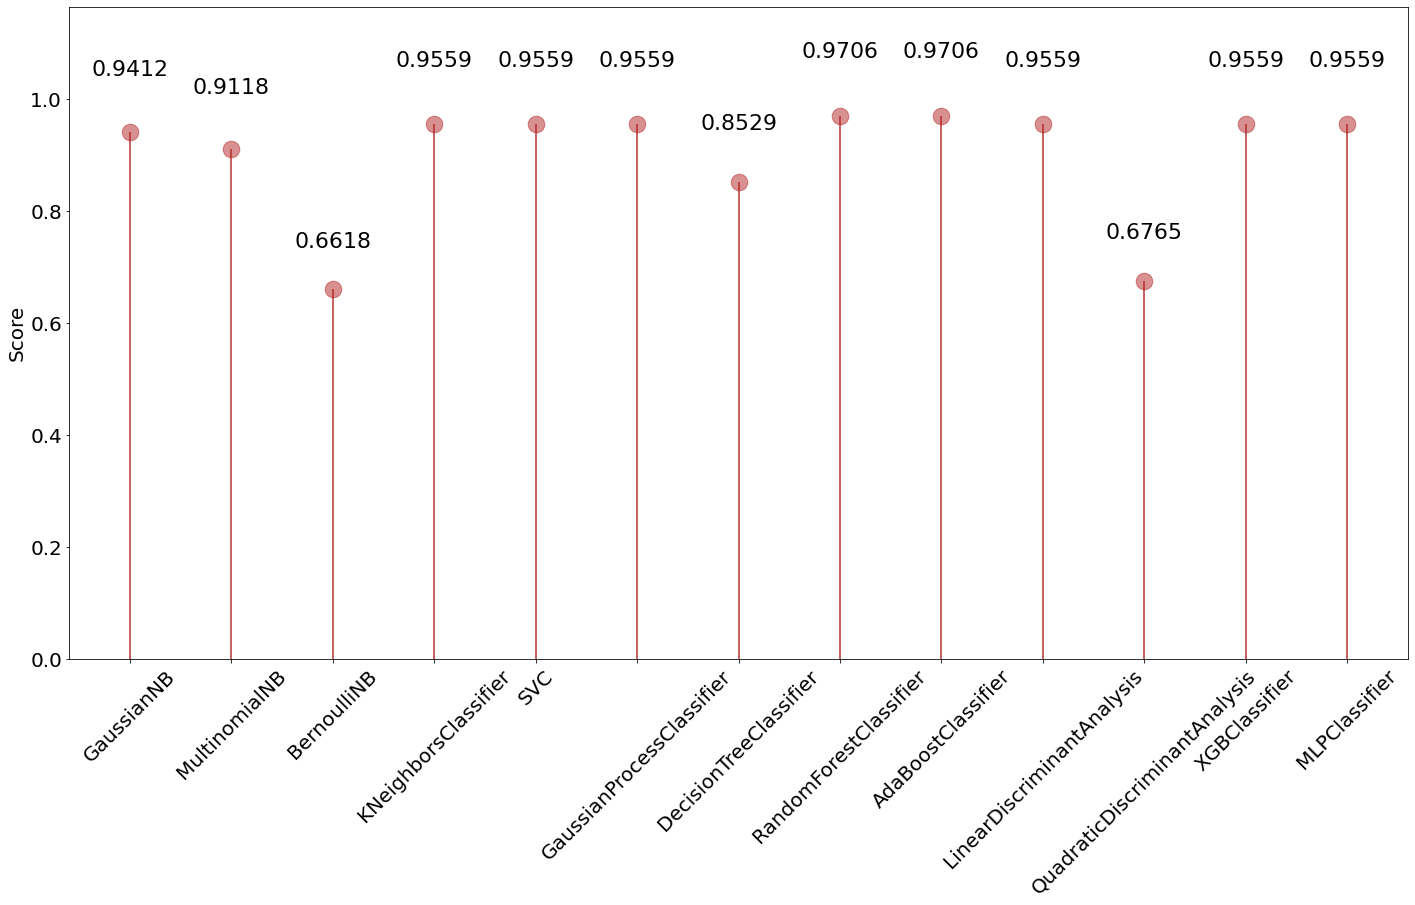

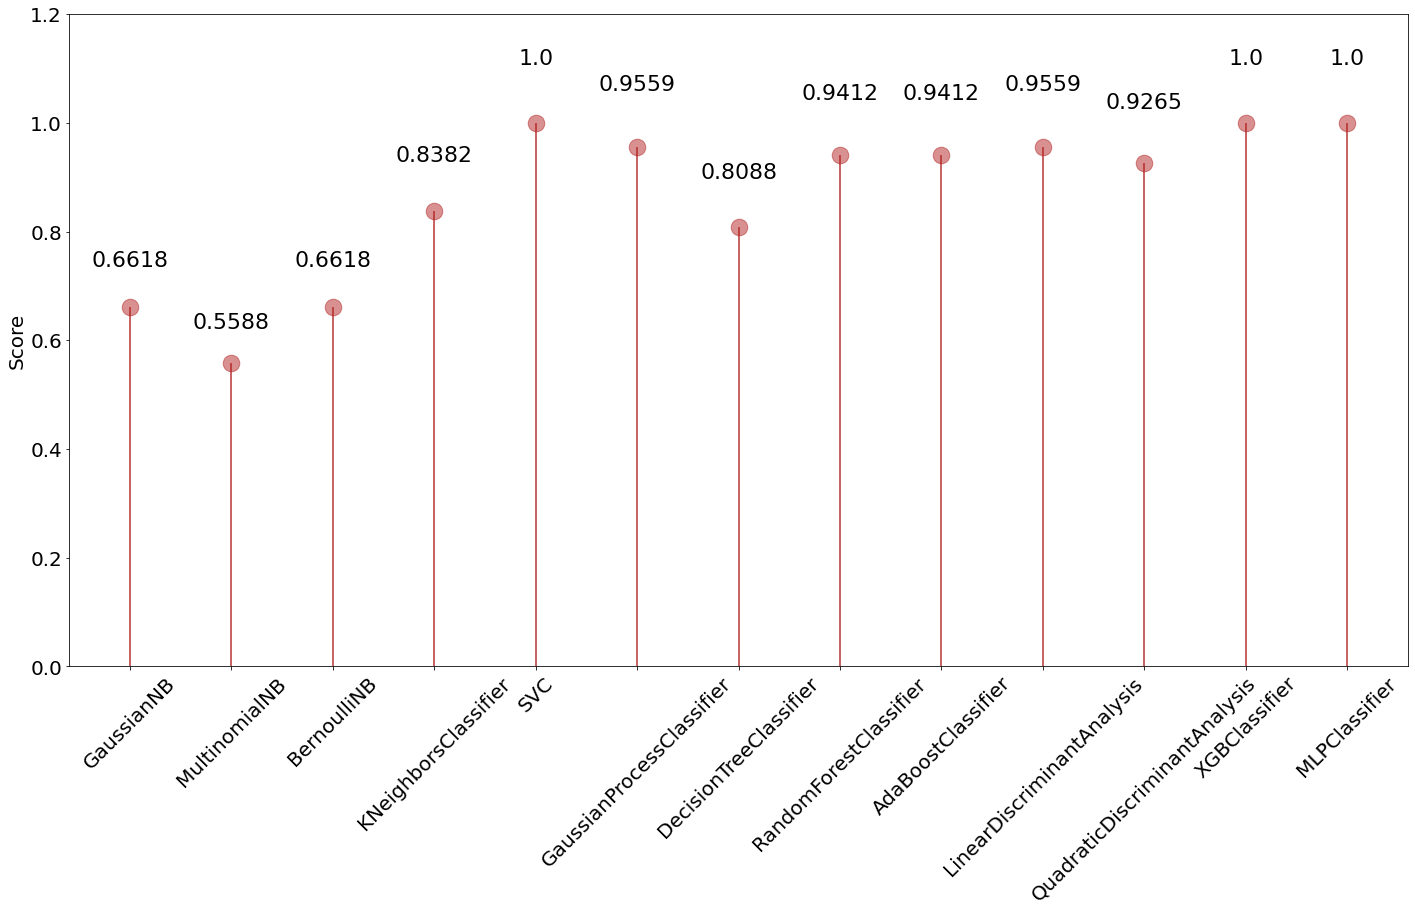

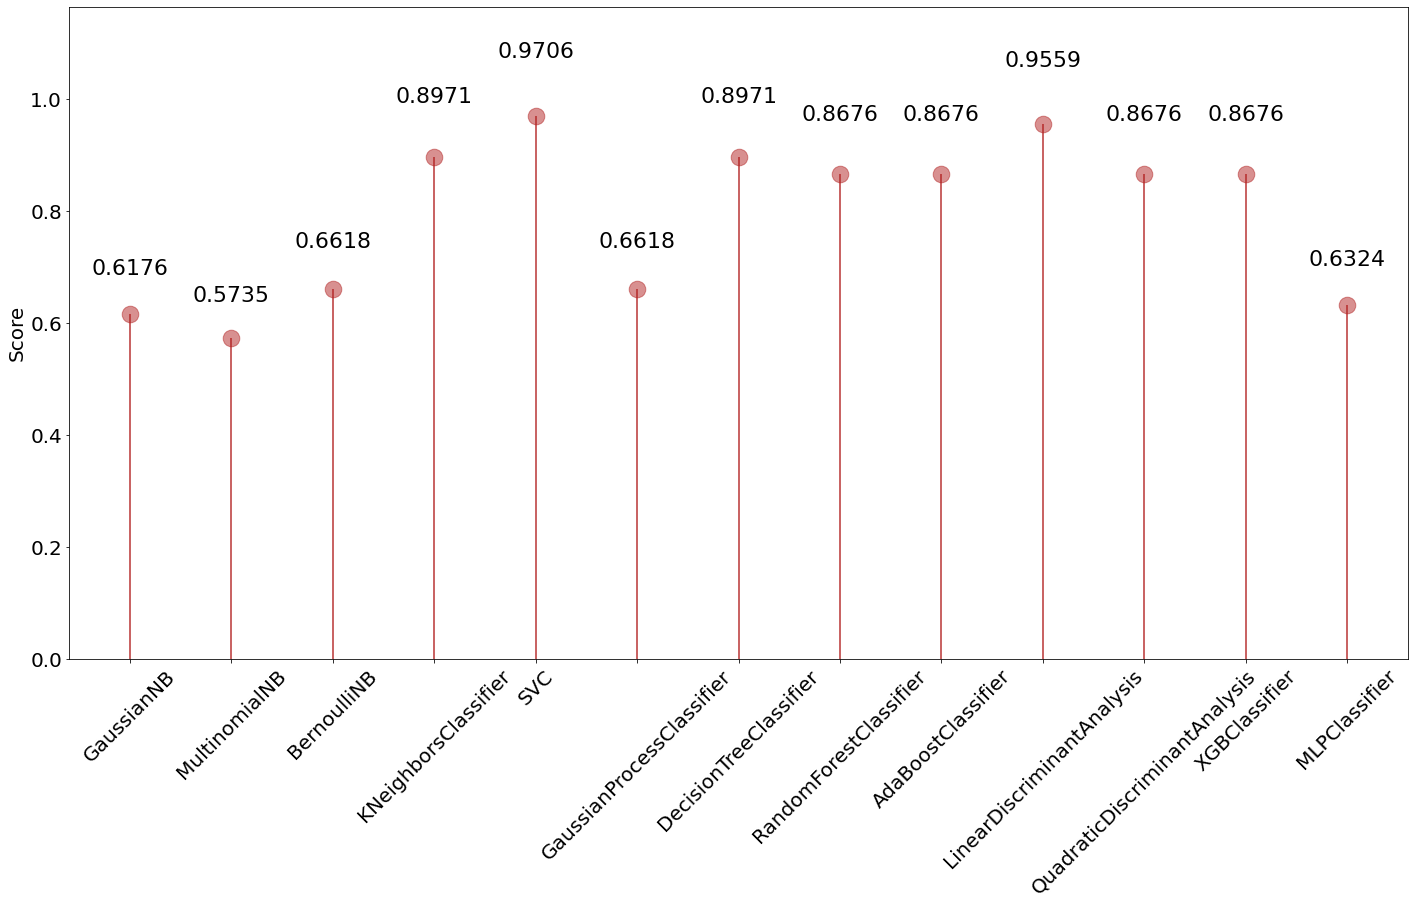

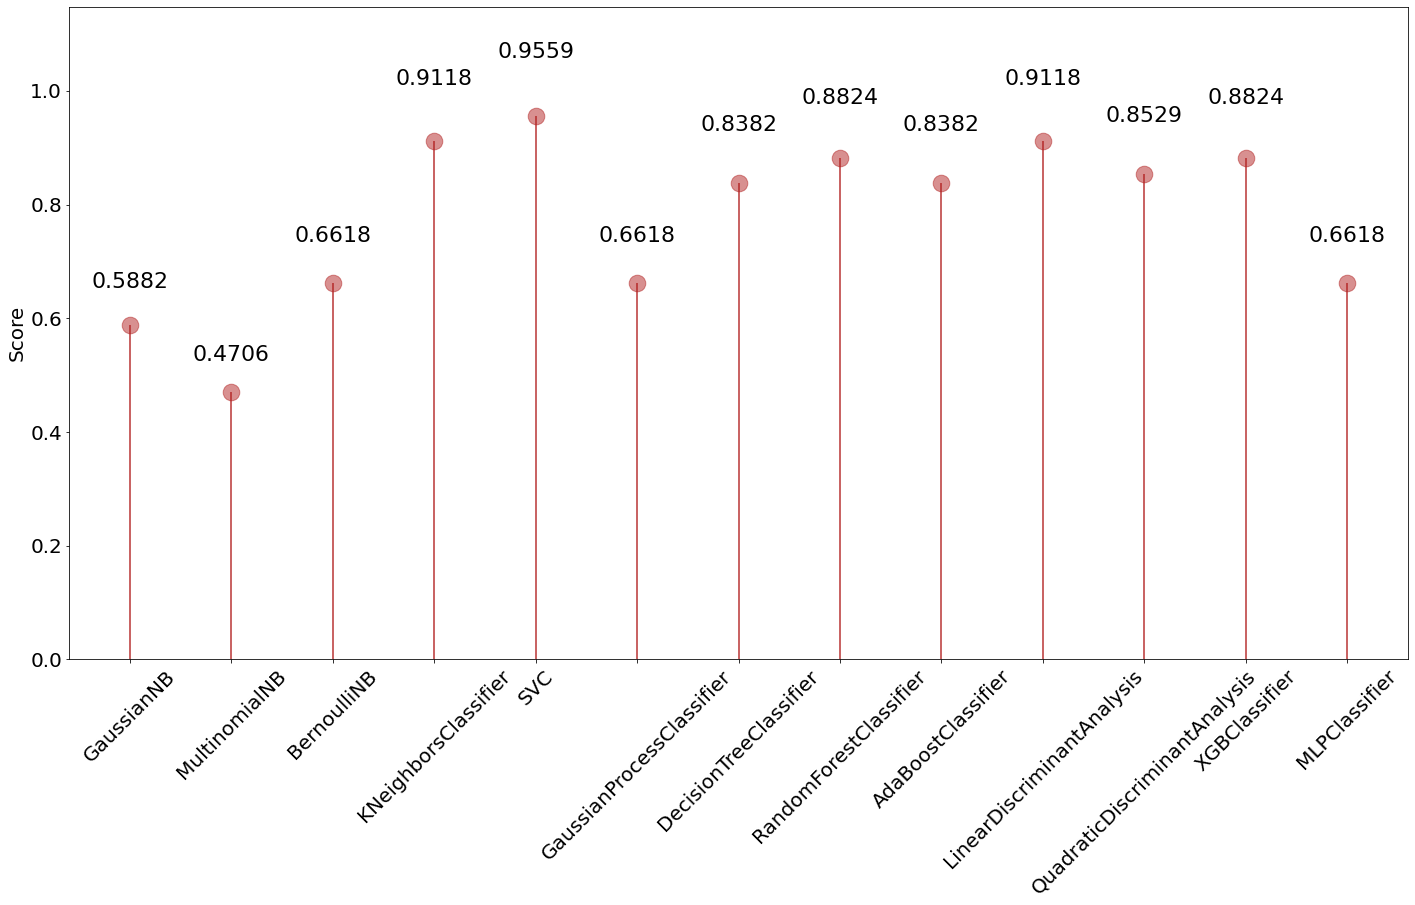

In [101]:
data_name='aa' # 
method='csp'  # 'csp', 'bandpowers', 'dct', 'wavelet'
for data_name in ['aa', 'al', 'av', 'aw', 'ay']:
    for method in ['csp', 'bandpowers', 'dct', 'wavelet']:
        filename='data_set_IVa_{}'.format(data_name)
        data_path = os.path.join('./result', filename, filename + '_{}'.format(method)+'_result.csv')
        res_df = pd.read_csv(data_path)
        
        save_dir = os.path.join('./result', 'pic')
        save_path = os.path.join(save_dir, filename + '_{}'.format(method)+'_result.png')
        show(res_df, save_path)

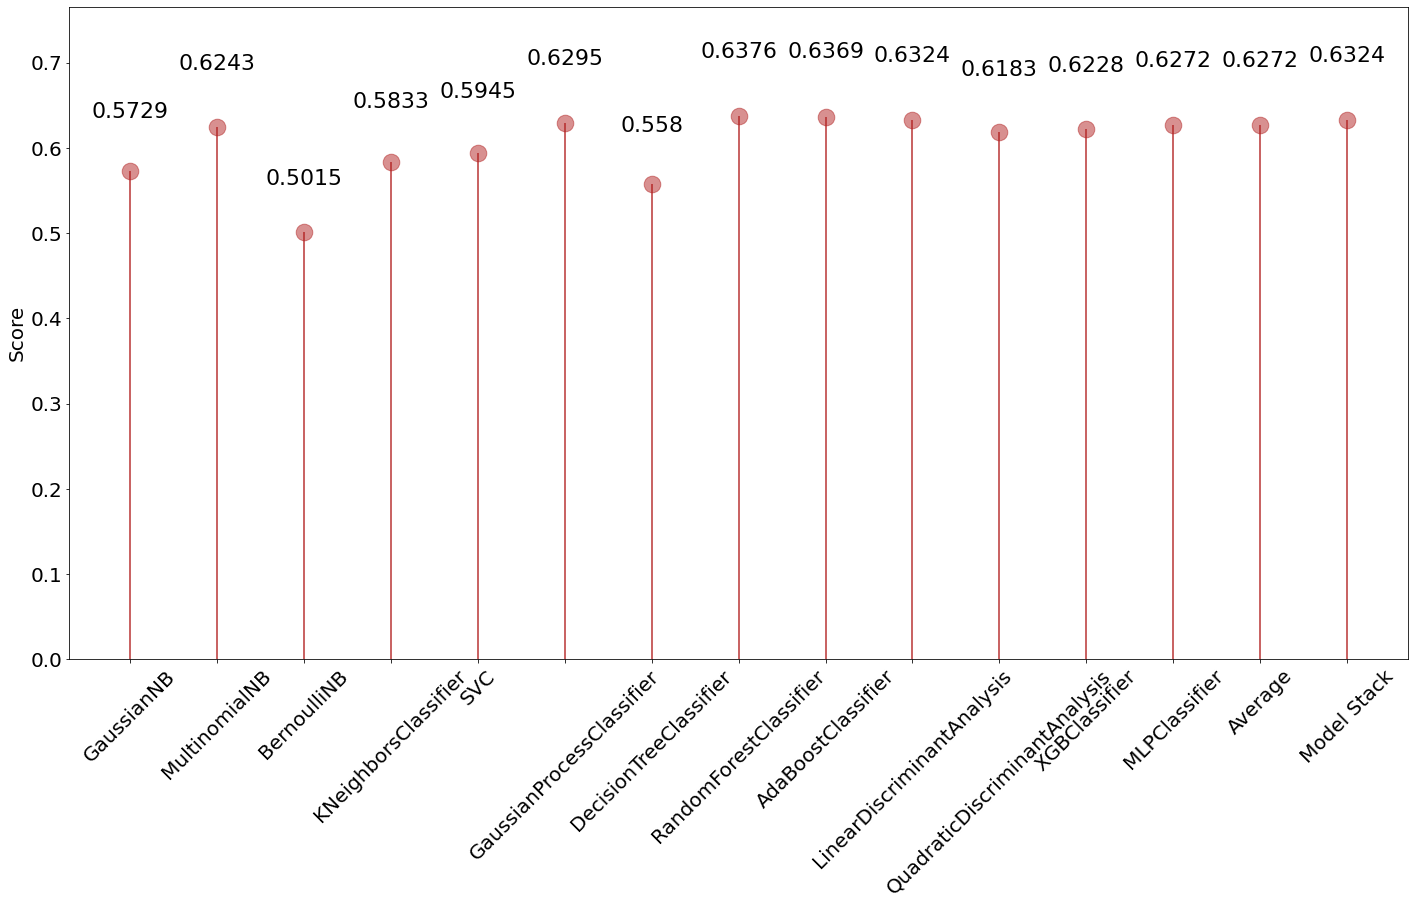

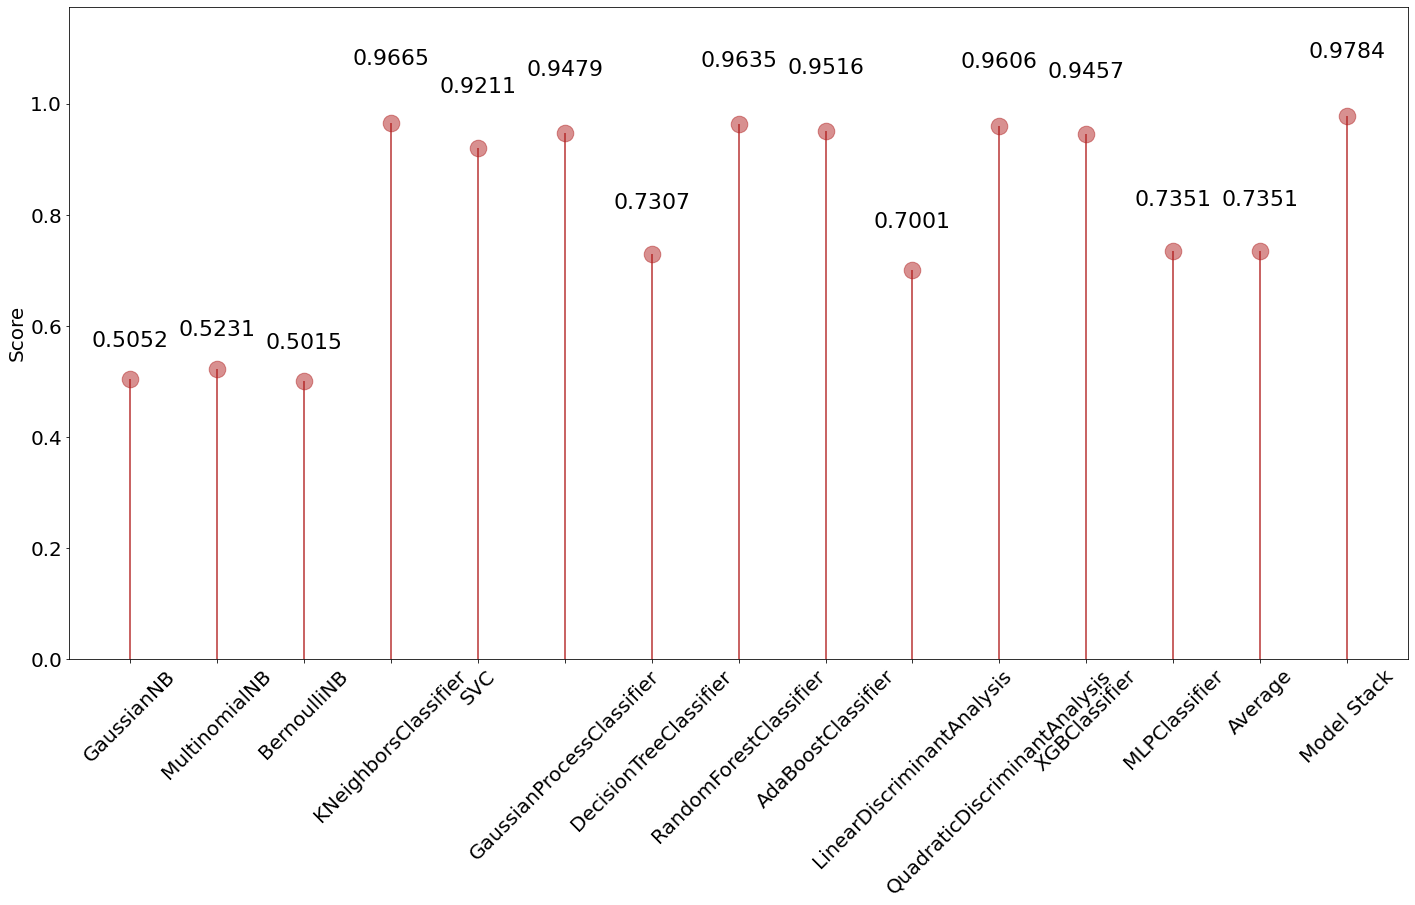

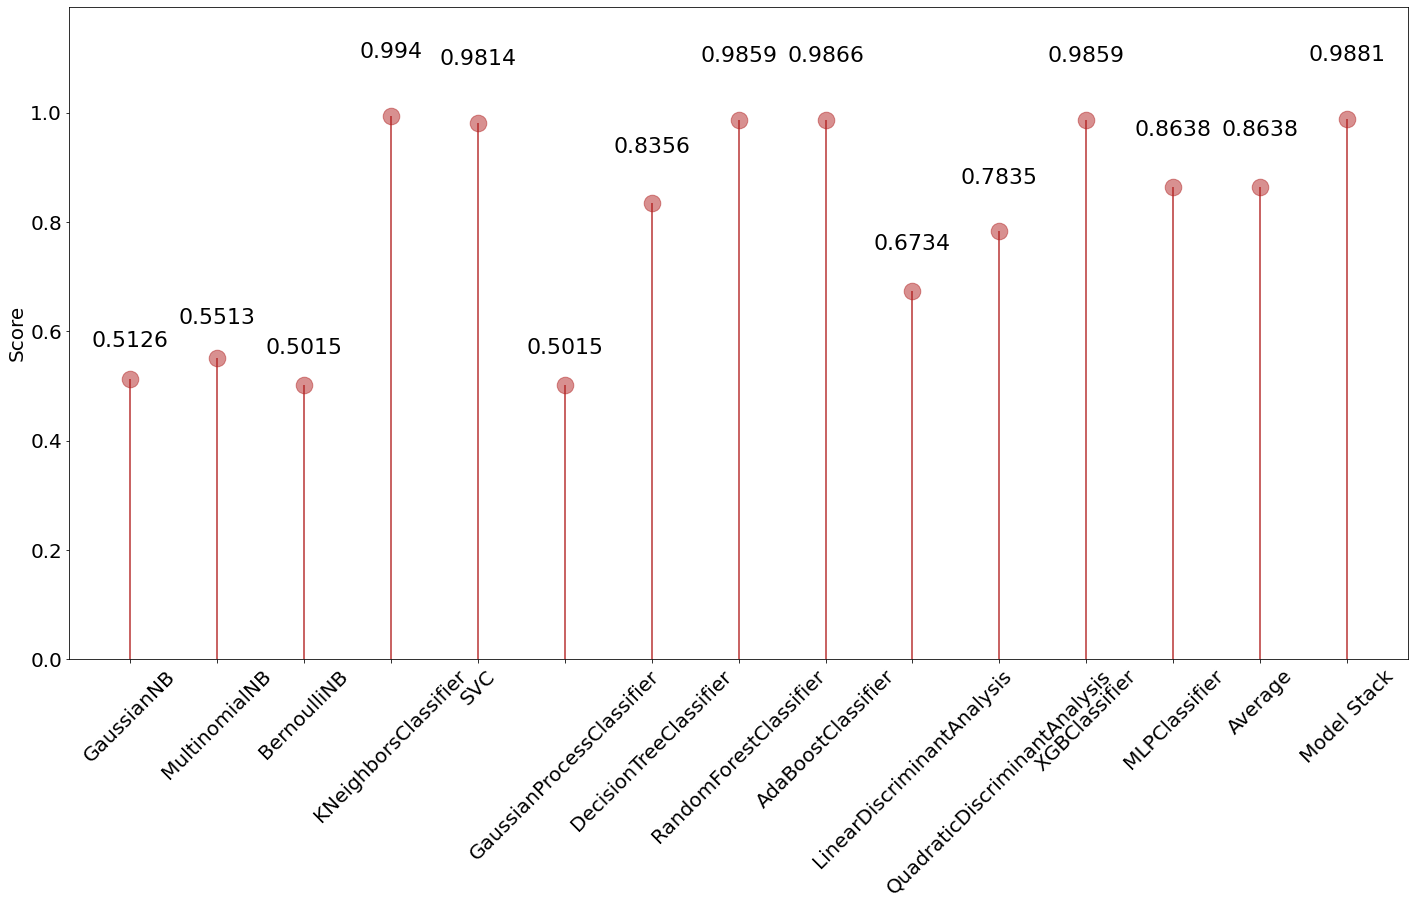

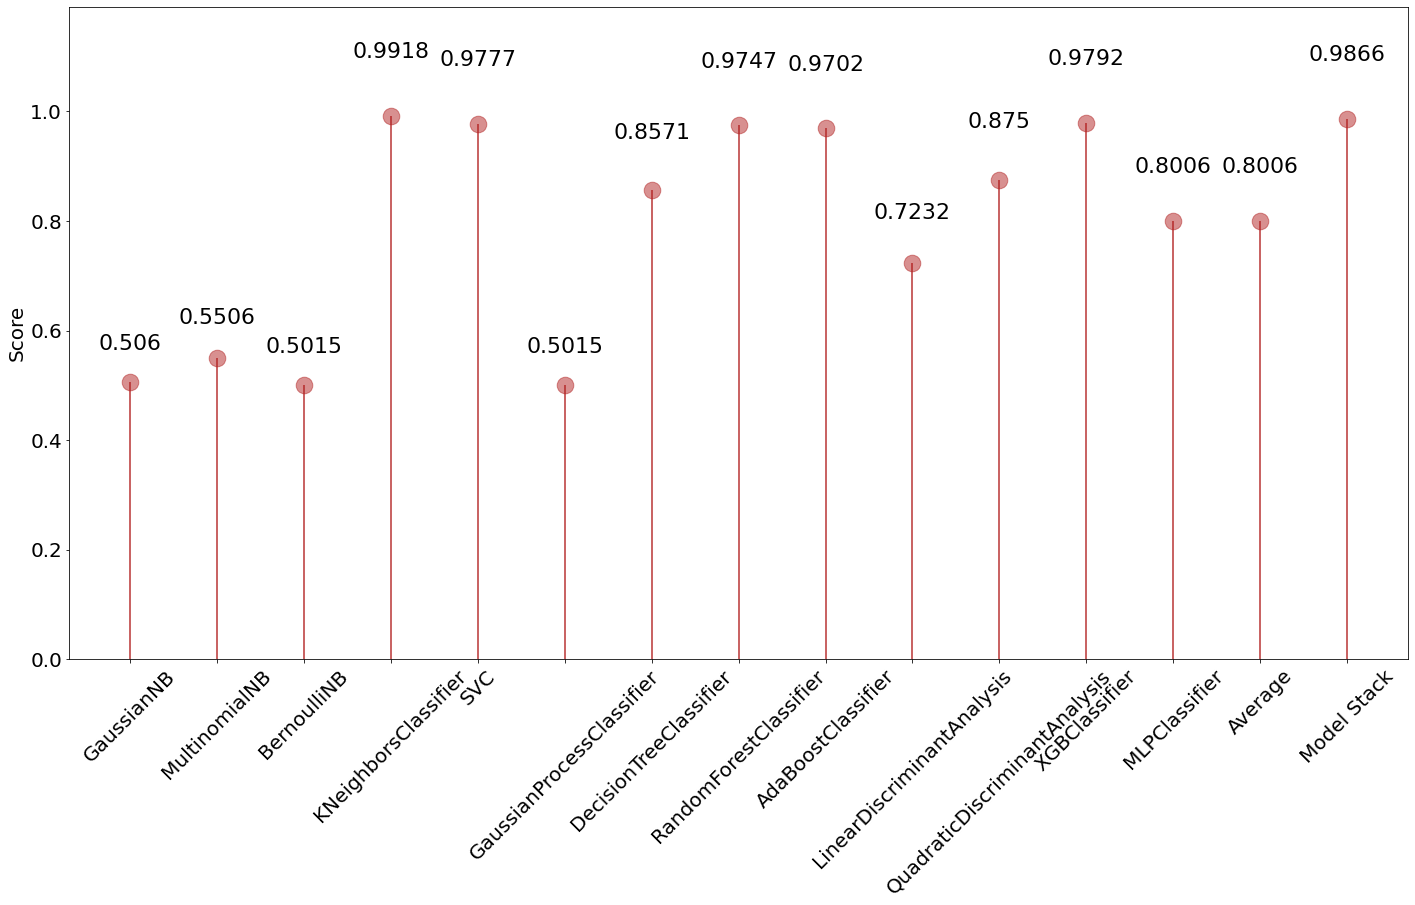

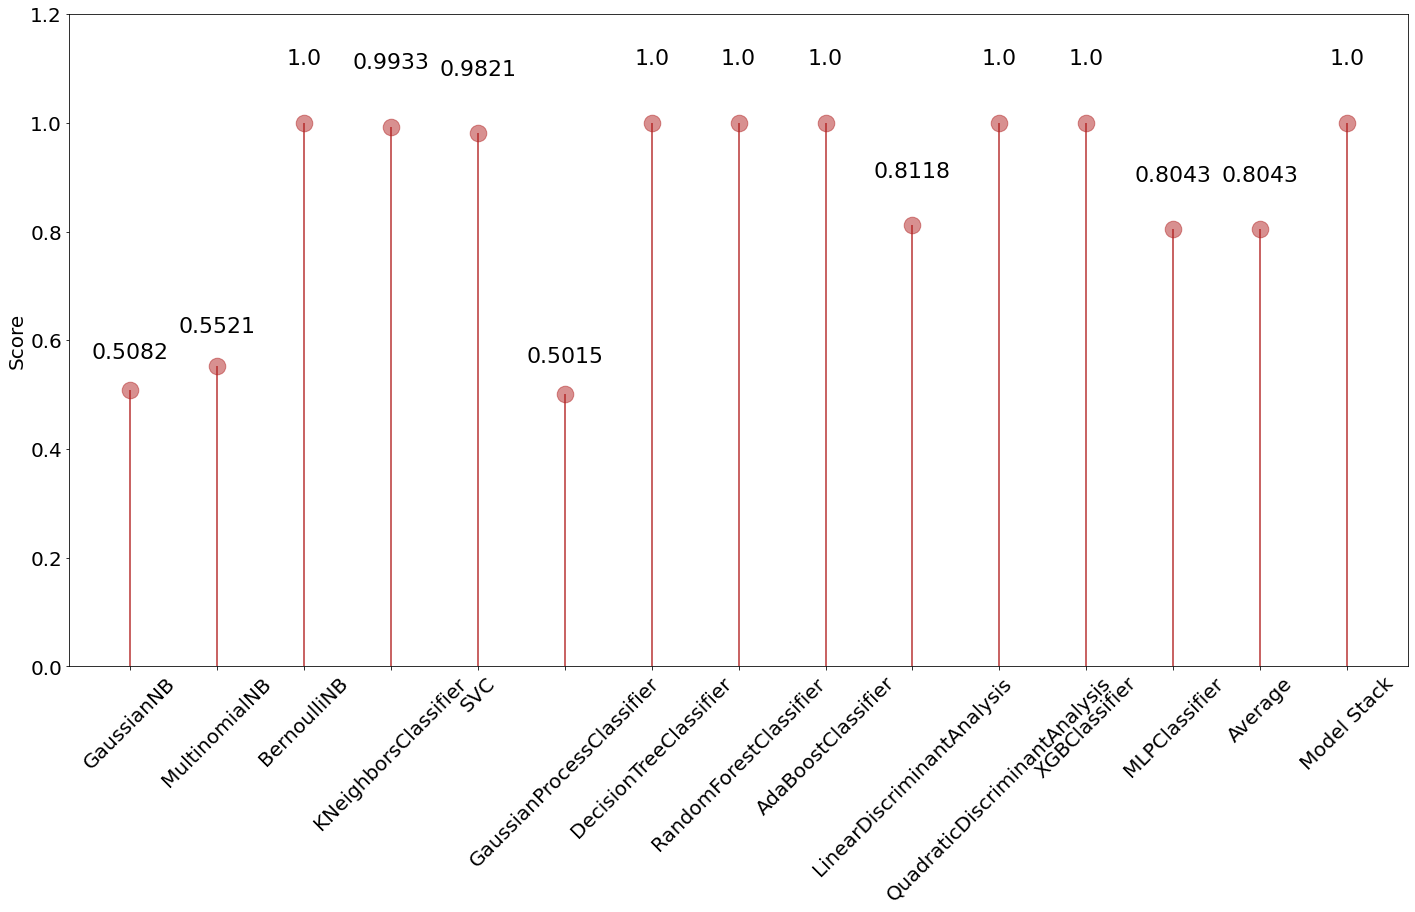

In [102]:
## 拼接所有的数据
for method in ['csp', 'bandpowers', 'dct', 'wavelet', 'all']:
    filename='data_set_IVa_{}'.format(data_name)
    data_path = os.path.join('./result/data_all', 'data_all_{}'.format(method)+'_result.csv')
    res_df = pd.read_csv(data_path)

    save_dir = os.path.join('./result', 'pic')
    save_path = os.path.join(save_dir, 'data_all_{}'.format(method)+'_result.png')
    show(res_df, save_path)

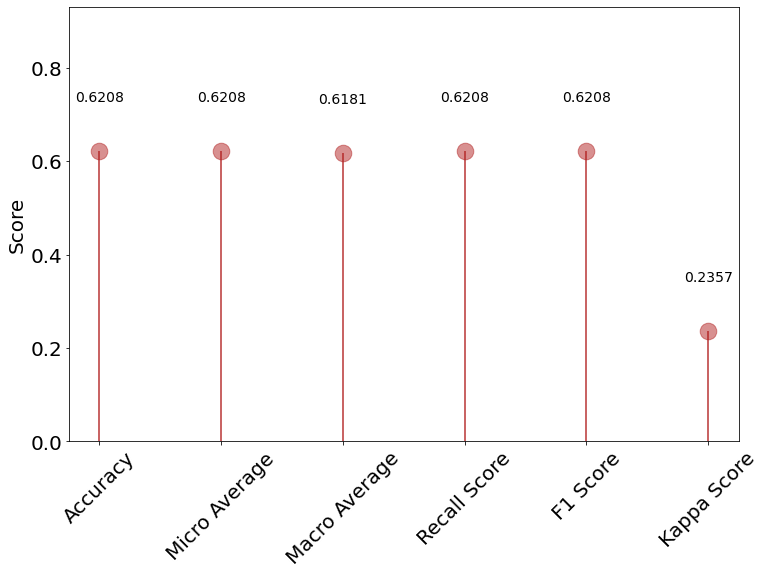

In [103]:
## the best model
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *

def Evaluate(model, X, y, index=0):
    AS, MIS, MAS, RS, F1S, KS = [], [], [], [], [], []
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        if index == 0:
            model.fit(X_train)
            
        else:
            model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        AS.append(accuracy_score(y_test, y_pred)) # 准确率
        MIS.append(precision_score(y_test, y_pred, average='micro'))
        MAS.append(precision_score(y_test, y_pred, average='macro'))
        RS.append(recall_score(y_test, y_pred, average='micro'))
        F1S.append(f1_score(y_test, y_pred,  average='weighted'))
        KS.append(cohen_kappa_score(y_test, y_pred))
    
    return pd.DataFrame({
        'index':['Accuracy', 'Micro Average', 'Macro Average', 'Recall Score', 'F1 Score', 'Kappa Score'],
        'score':[min(round(i, 4), 1.0000) for i in [mean(AS), mean(MIS), mean(MAS), mean(RS), mean(F1S), mean(KS)]]
    })

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis(priors=None, 
                                        reg_param=0.0, 
                                        store_covariance=False, 
                                        tol=1e-4)
# clf.fit(X, y) 

res_df = Evaluate(clf, X, y, index=1)

plt.figure(figsize=(12, 8))
plt.vlines(x=res_df['index'], ymin=0, ymax=res_df['score'], color='firebrick', alpha=0.7, linewidth=2)
plt.scatter(res_df['index'], res_df['score'], s=275, color='firebrick', alpha=0.5)

for k in res_df.values:
    plt.text(k[0], k[1]+0.1, k[1], horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.ylim([0, max( res_df['score'])*1.5])
plt.xticks(fontsize=20, rotation=45);
plt.yticks(fontsize=20);
plt.ylabel('Score', fontsize=20);